# **Import libraries and our dataset**

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
pd.set_option('display.max_columns', None) #display everything in data output
pokedata = pd.read_csv('pokemon.csv') 
pokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

# **Removal of variables that are definitely not related to our problem statement** 

In [3]:
pokedata = pokedata.drop(['japanese_name','pokedex_number','name'], axis = 1)
pokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

# **Removal of row 773, which has a non-numerical value for capture rate and it is the only pokemon with multiple capture rates**

In [4]:
a = pokedata[~(pokedata['capture_rate'].str.isnumeric())]
a.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30 (Meteorite)255 (Core),Meteor Pokémon,60,1059860,0.3,60,NaN,100,60,120,rock,flying,40.0,7,0


In [5]:
pokedata.drop(pokedata.index[773], inplace=True)
pokedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 800
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          800 non-null    object 
 1   against_bug        800 non-null    float64
 2   against_dark       800 non-null    float64
 3   against_dragon     800 non-null    float64
 4   against_electric   800 non-null    float64
 5   against_fairy      800 non-null    float64
 6   against_fight      800 non-null    float64
 7   against_fire       800 non-null    float64
 8   against_flying     800 non-null    float64
 9   against_ghost      800 non-null    float64
 10  against_grass      800 non-null    float64
 11  against_ground     800 non-null    float64
 12  against_ice        800 non-null    float64
 13  against_normal     800 non-null    float64
 14  against_poison     800 non-null    float64
 15  against_psychic    800 non-null    float64
 16  against_rock       800 non

# **Dropping rows with null values for weight**

In [6]:
pokedata = pokedata.dropna(subset=['weight_kg'])
print('Length of dataset:',len(pokedata))
pokedata['weight_kg'].describe()

Length of dataset: 780


count    780.000000
mean      61.405513
std      109.422248
min        0.100000
25%        9.000000
50%       27.150000
75%       64.850000
max      999.900000
Name: weight_kg, dtype: float64

# **Analysis of weight**

<Axes: >

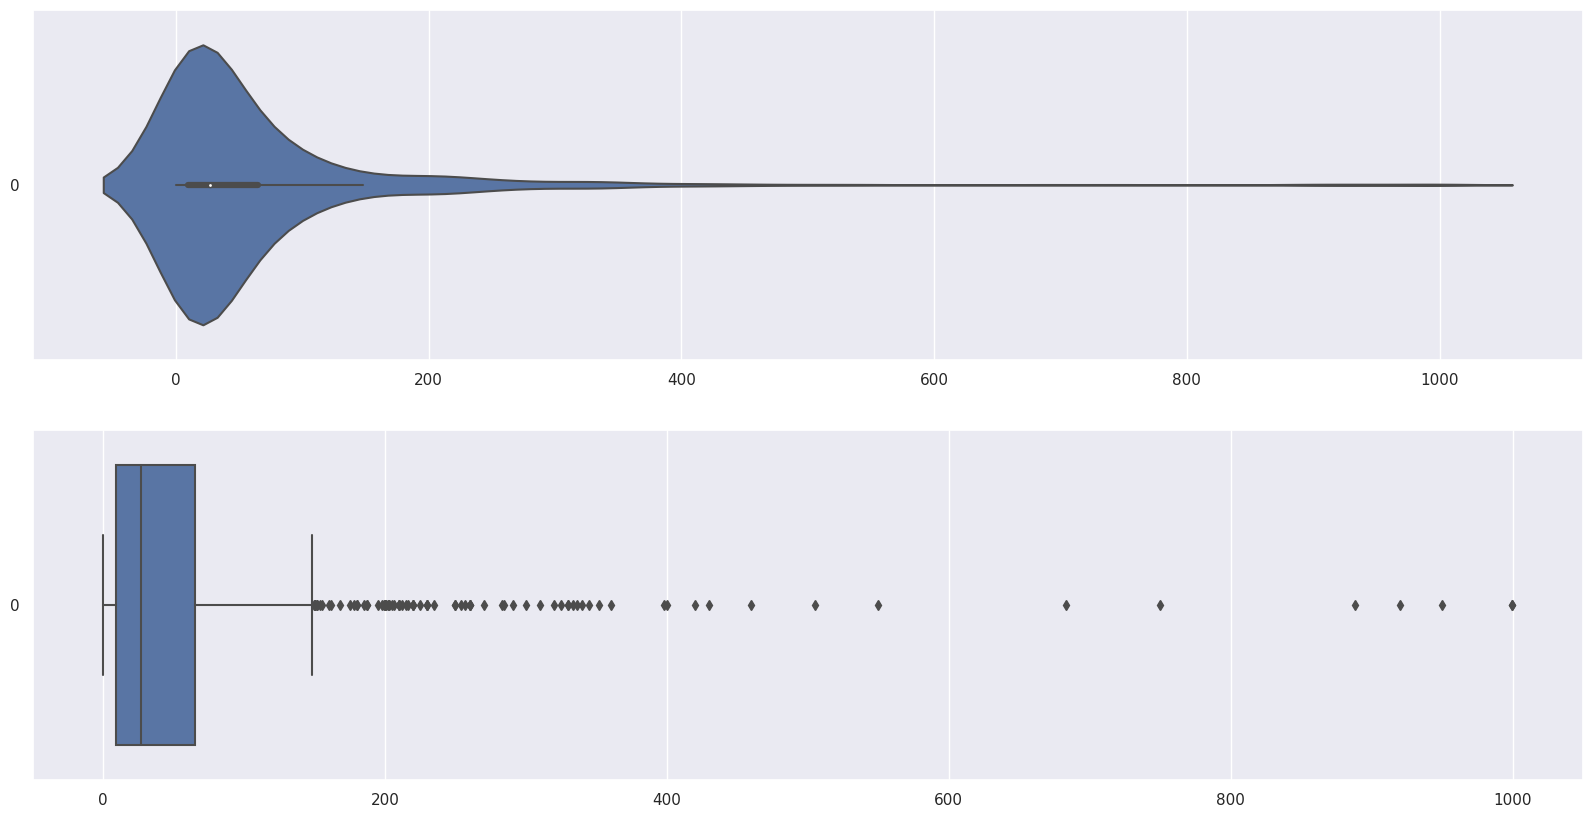

In [7]:
f, axes = plt.subplots(2, 1, figsize=(20,10))
sb.violinplot(data = pokedata['weight_kg'], orient = "h", ax = axes[0])
sb.boxplot(data=pokedata['weight_kg'], orient = "h", ax = axes[1])

# **Analysis of height**

<Axes: >

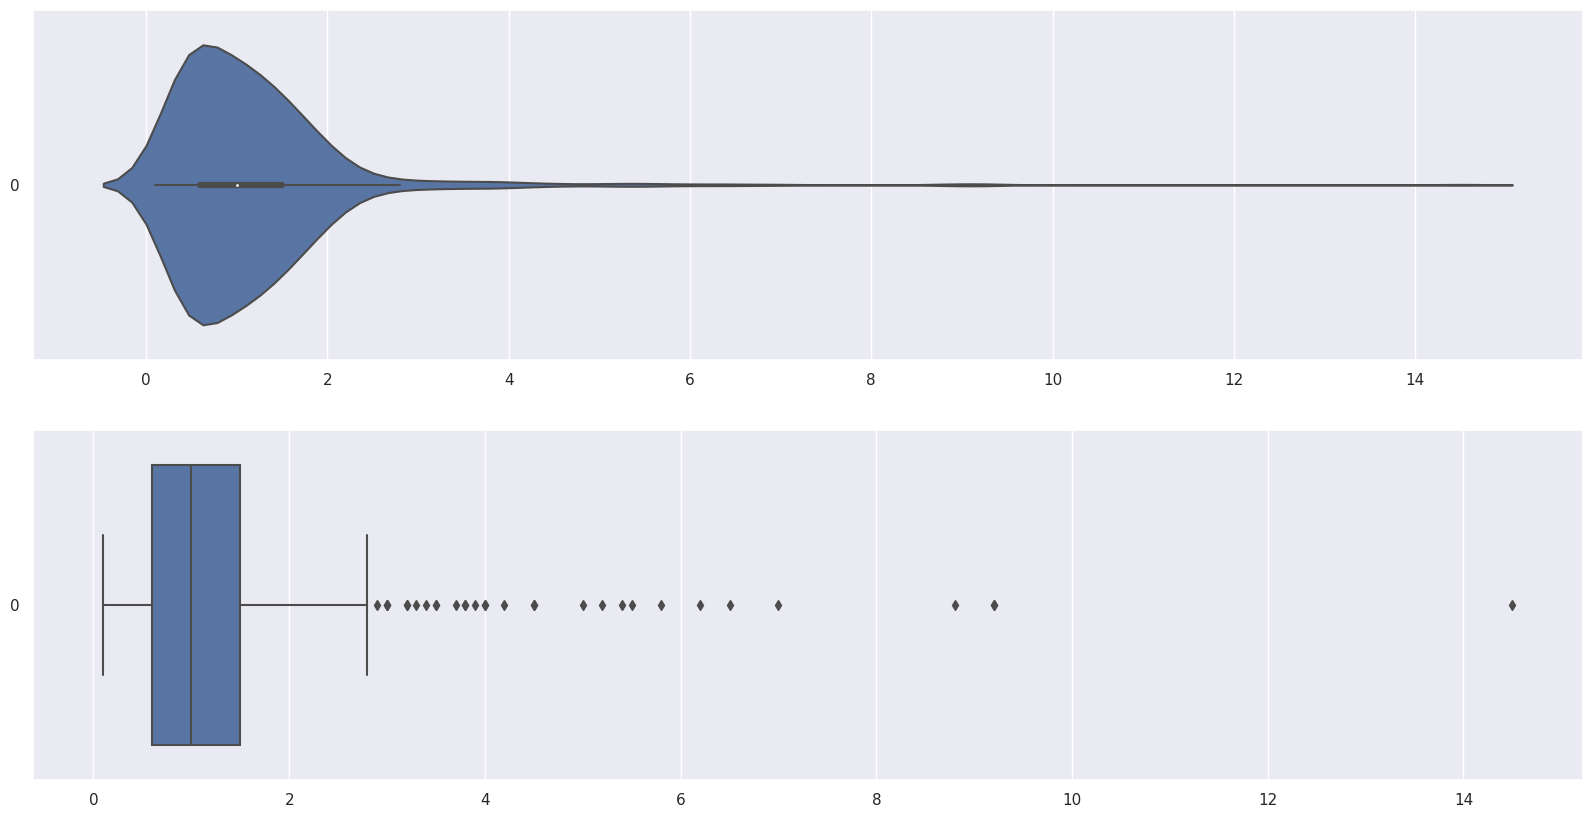

In [8]:
f, axes = plt.subplots(2, 1, figsize=(20,10))
sb.violinplot(data = pokedata['height_m'], orient = "h", ax = axes[0])
sb.boxplot(data=pokedata['height_m'], orient = "h", ax = axes[1])

# **Analysis of correlations of numerical variables with weight**

<Axes: >

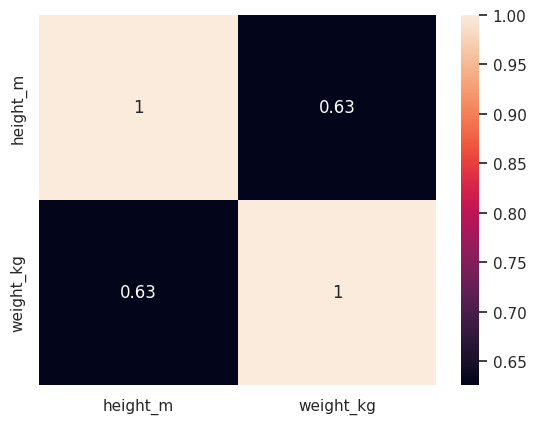

In [9]:
sb.heatmap(pokedata[['height_m','weight_kg']].corr(), annot=True)

<Axes: >

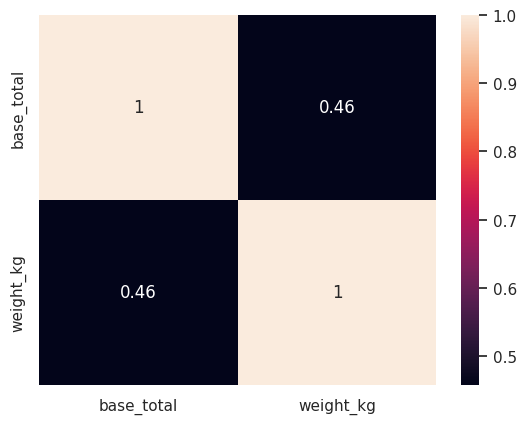

In [10]:
sb.heatmap(pokedata[['base_total','weight_kg']].corr(), annot=True)

<Axes: >

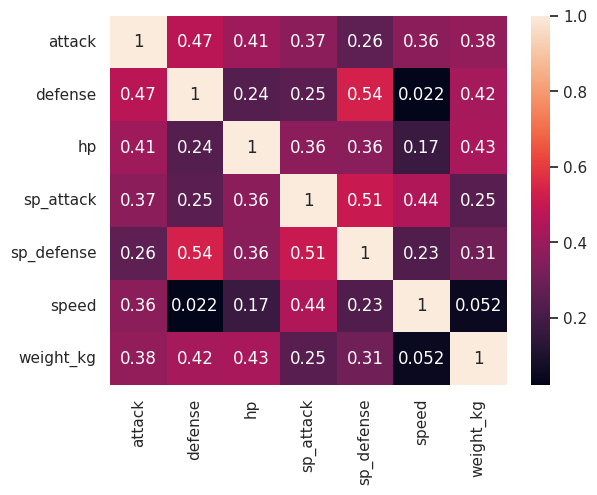

In [11]:
sb.heatmap(pokedata[['attack','defense','hp','sp_attack','sp_defense','speed','weight_kg']].corr(), annot=True)

<Axes: >

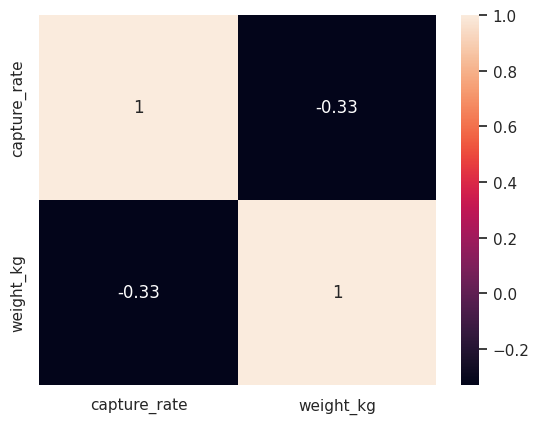

In [12]:
pokedata['capture_rate'] = pokedata['capture_rate'].astype(int)
sb.heatmap(pokedata[['capture_rate','weight_kg']].corr(), annot=True)

# **Analysis of count distributions of variables**

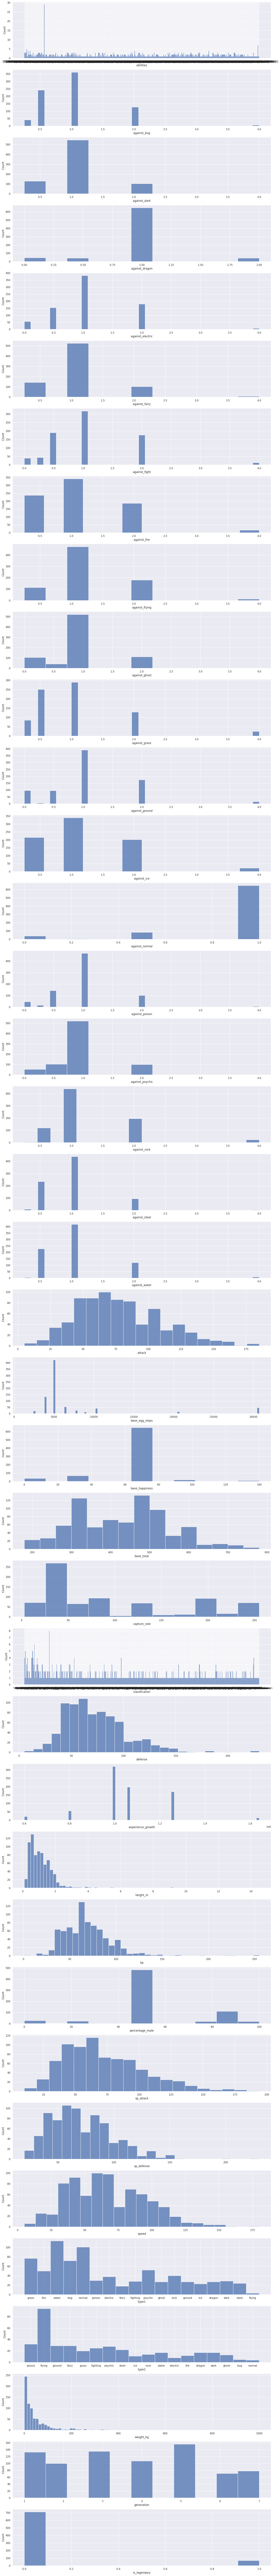

In [13]:
f, axes = plt.subplots(len(pokedata.columns), 1, figsize=(20,200))
i = 0

for variable in pokedata.columns:
  sb.histplot(data = pokedata[variable], ax = axes[i])
  i += 1

# **Analysis of categorical variables (some int64/float64 variables were converted into objects)**

# **Filled up null values of percentage male and type2**

<Axes: xlabel='weight_kg', ylabel='percentage_male'>

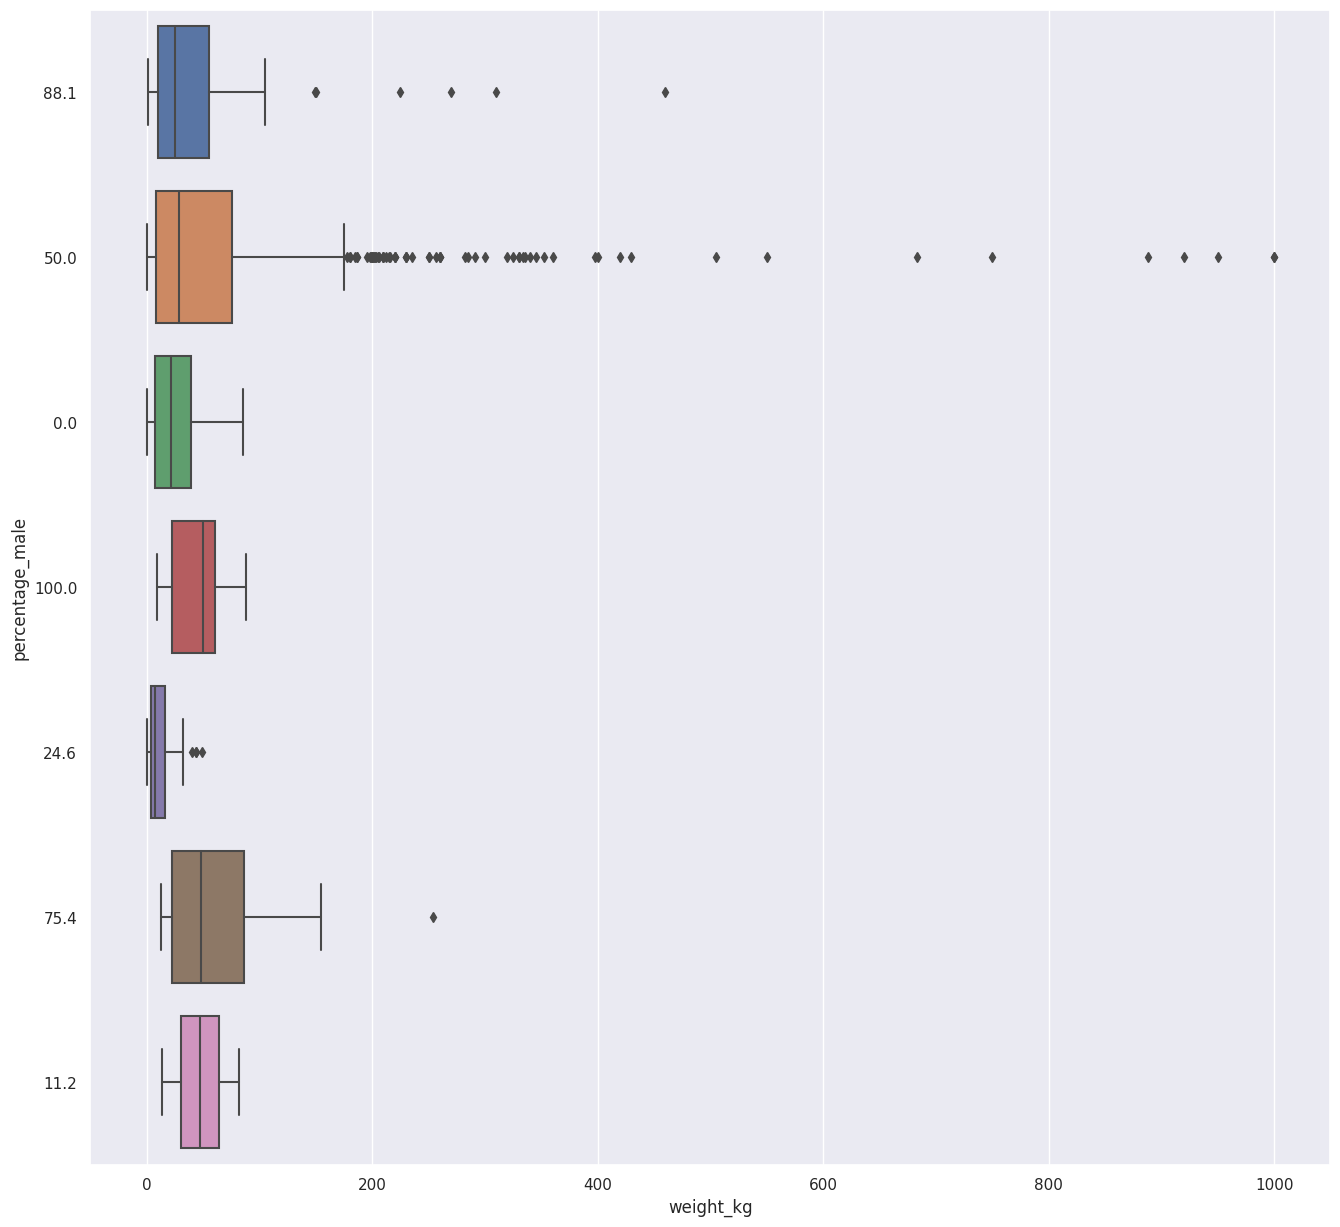

In [14]:
pokedata['percentage_male'].fillna(50, inplace=True)
pokedata['percentage_male'] = pokedata['percentage_male'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='percentage_male', orient="h")

In [15]:
pokedata["abilities"].describe()

count              780
unique             468
top       ['Levitate']
freq                29
Name: abilities, dtype: object

<Axes: xlabel='weight_kg', ylabel='levitate'>

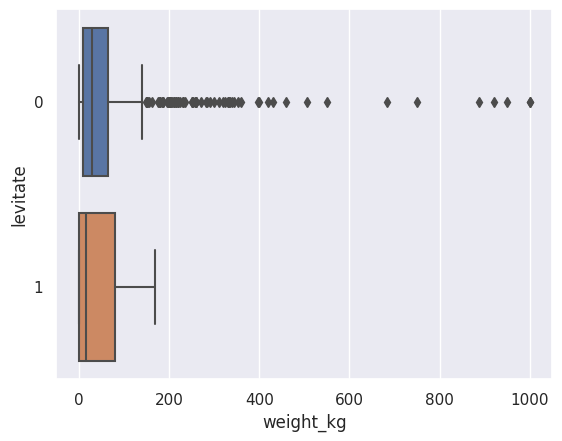

In [16]:
pokedata['levitate'] = pokedata["abilities"].apply(lambda x: '1' if x == "['Levitate']" else '0')
sb.boxplot(data=pokedata, x='weight_kg', y='levitate', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_bug'>

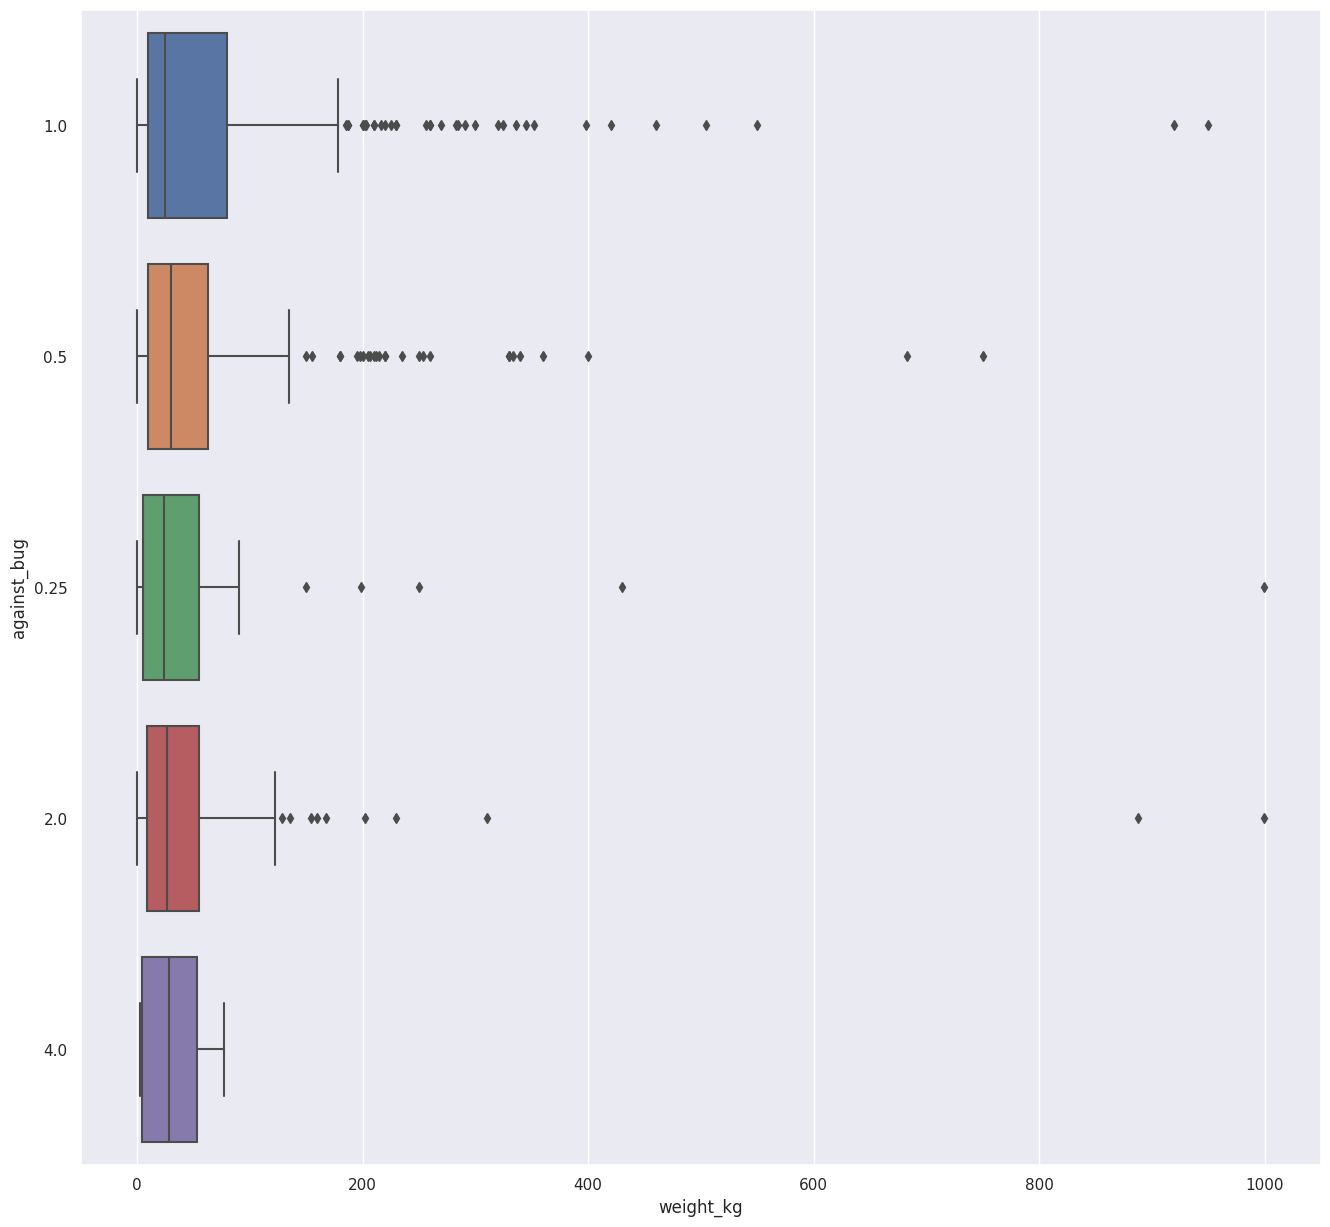

In [17]:
pokedata['against_bug'] = pokedata['against_bug'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_bug', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_dark'>

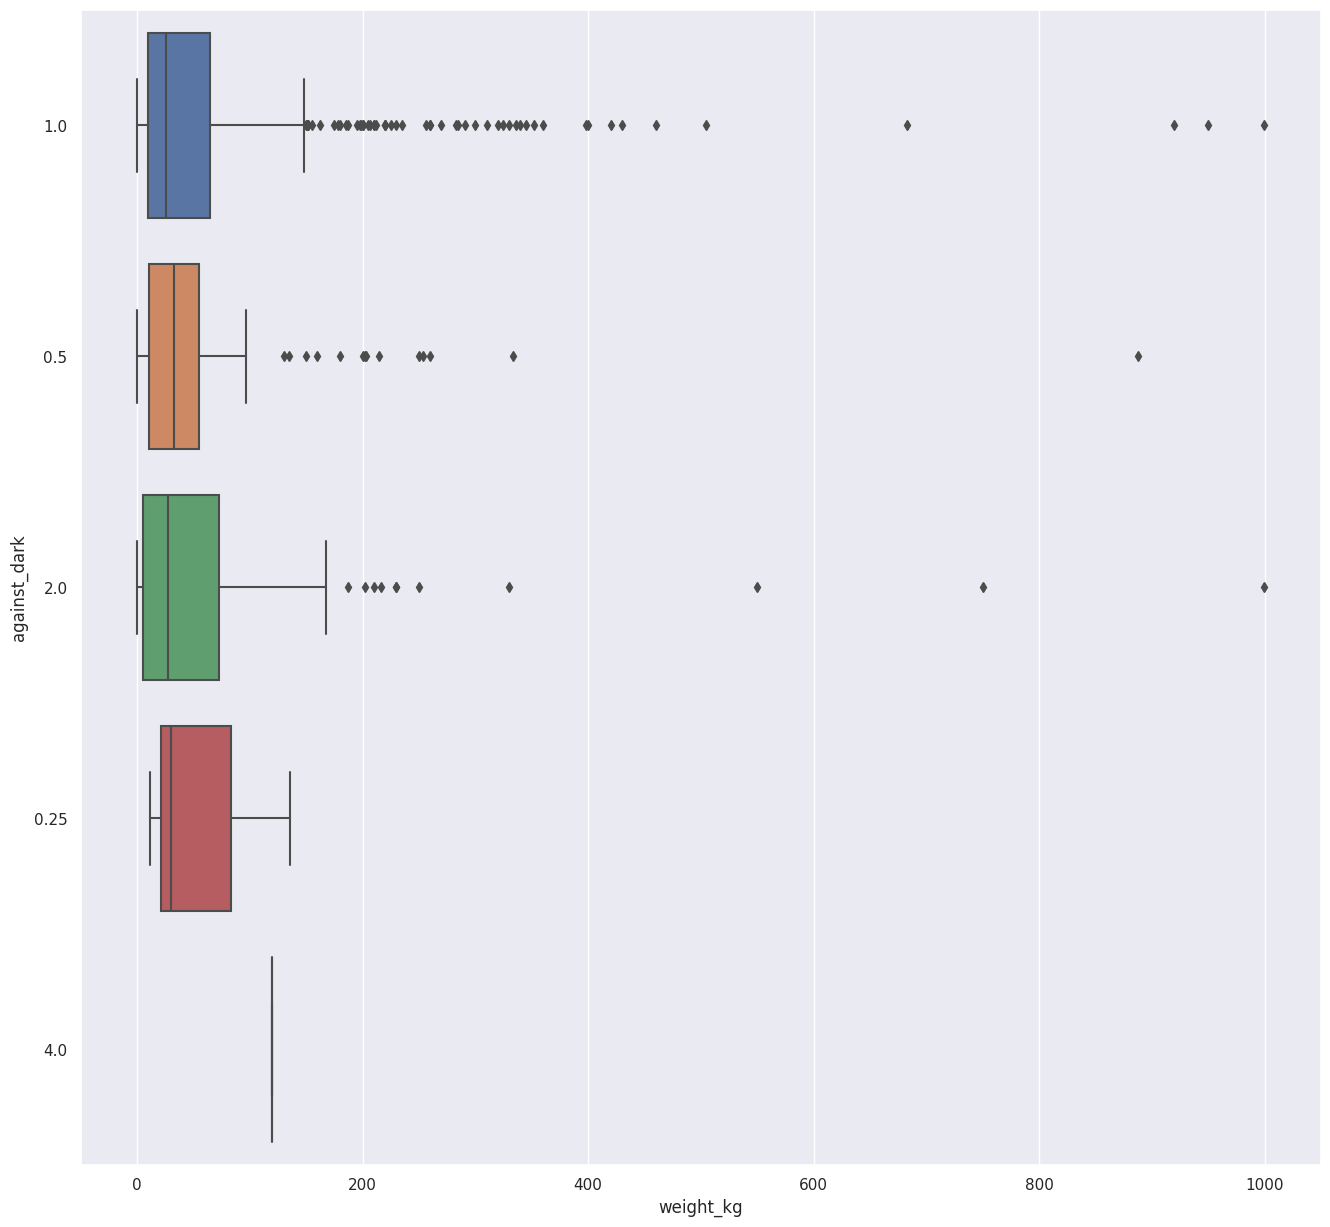

In [18]:
pokedata['against_dark'] = pokedata['against_dark'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_dark', orient="h")

0


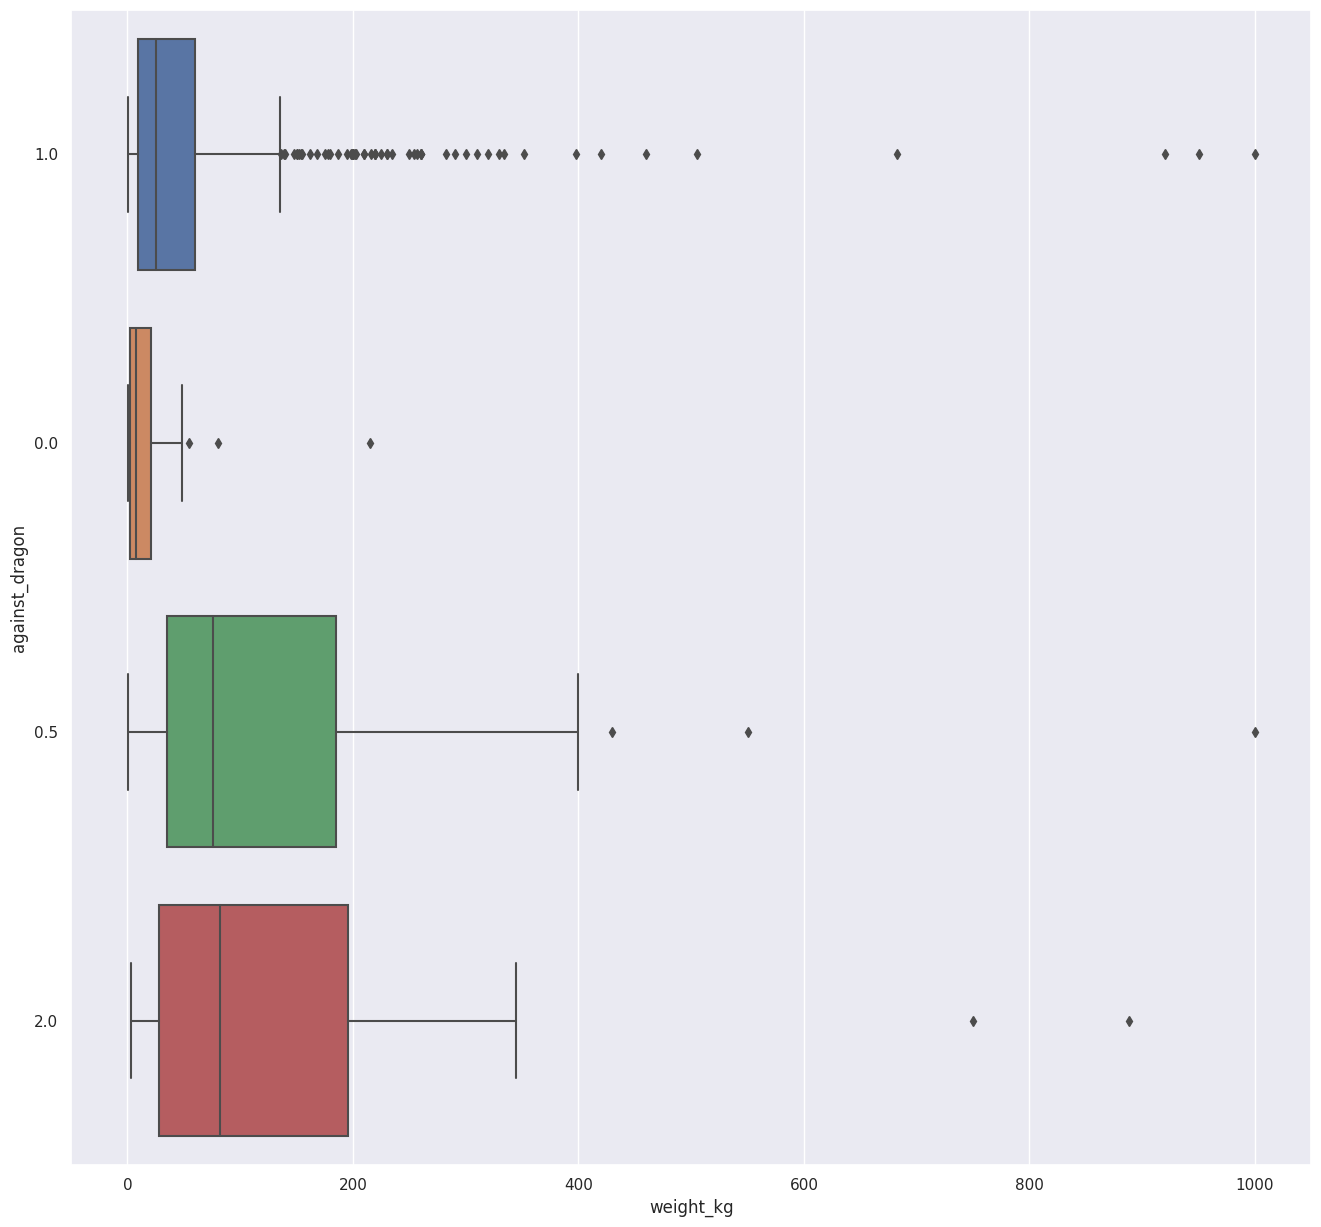

In [19]:
pokedata['against_dragon'] = pokedata['against_dragon'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_dragon', orient="h")
print(len(pokedata[(pokedata["against_dragon"]==1.0)]))

<Axes: xlabel='weight_kg', ylabel='against_electric'>

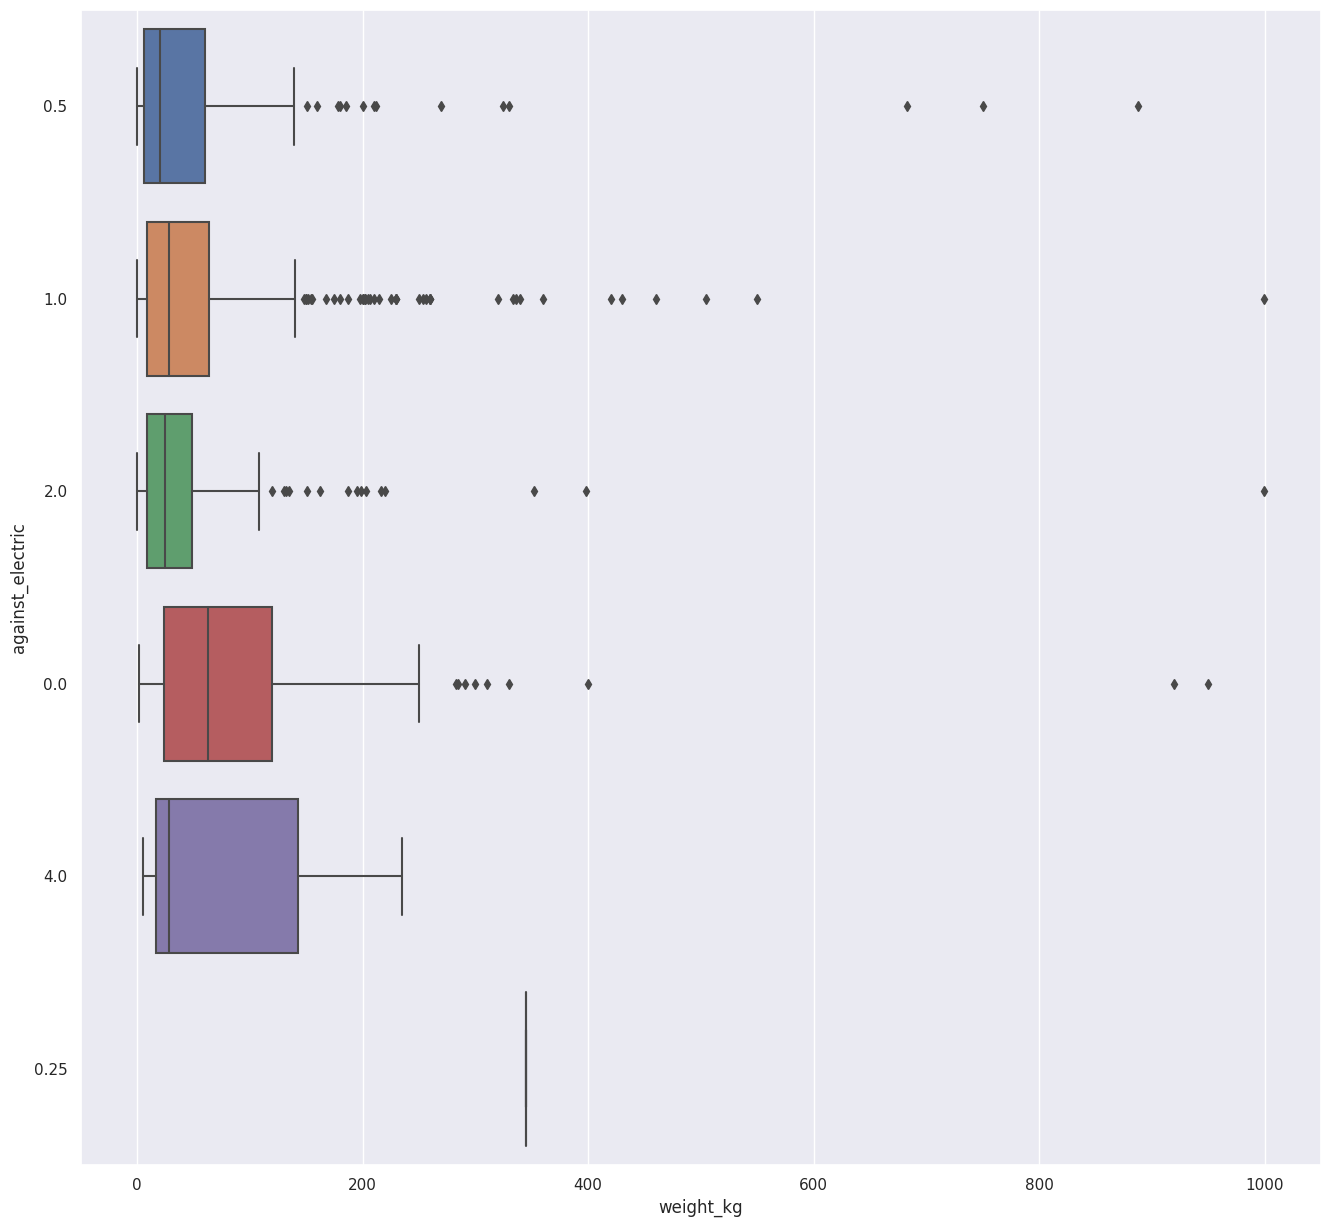

In [20]:
pokedata['against_electric'] = pokedata['against_electric'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_electric', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_fairy'>

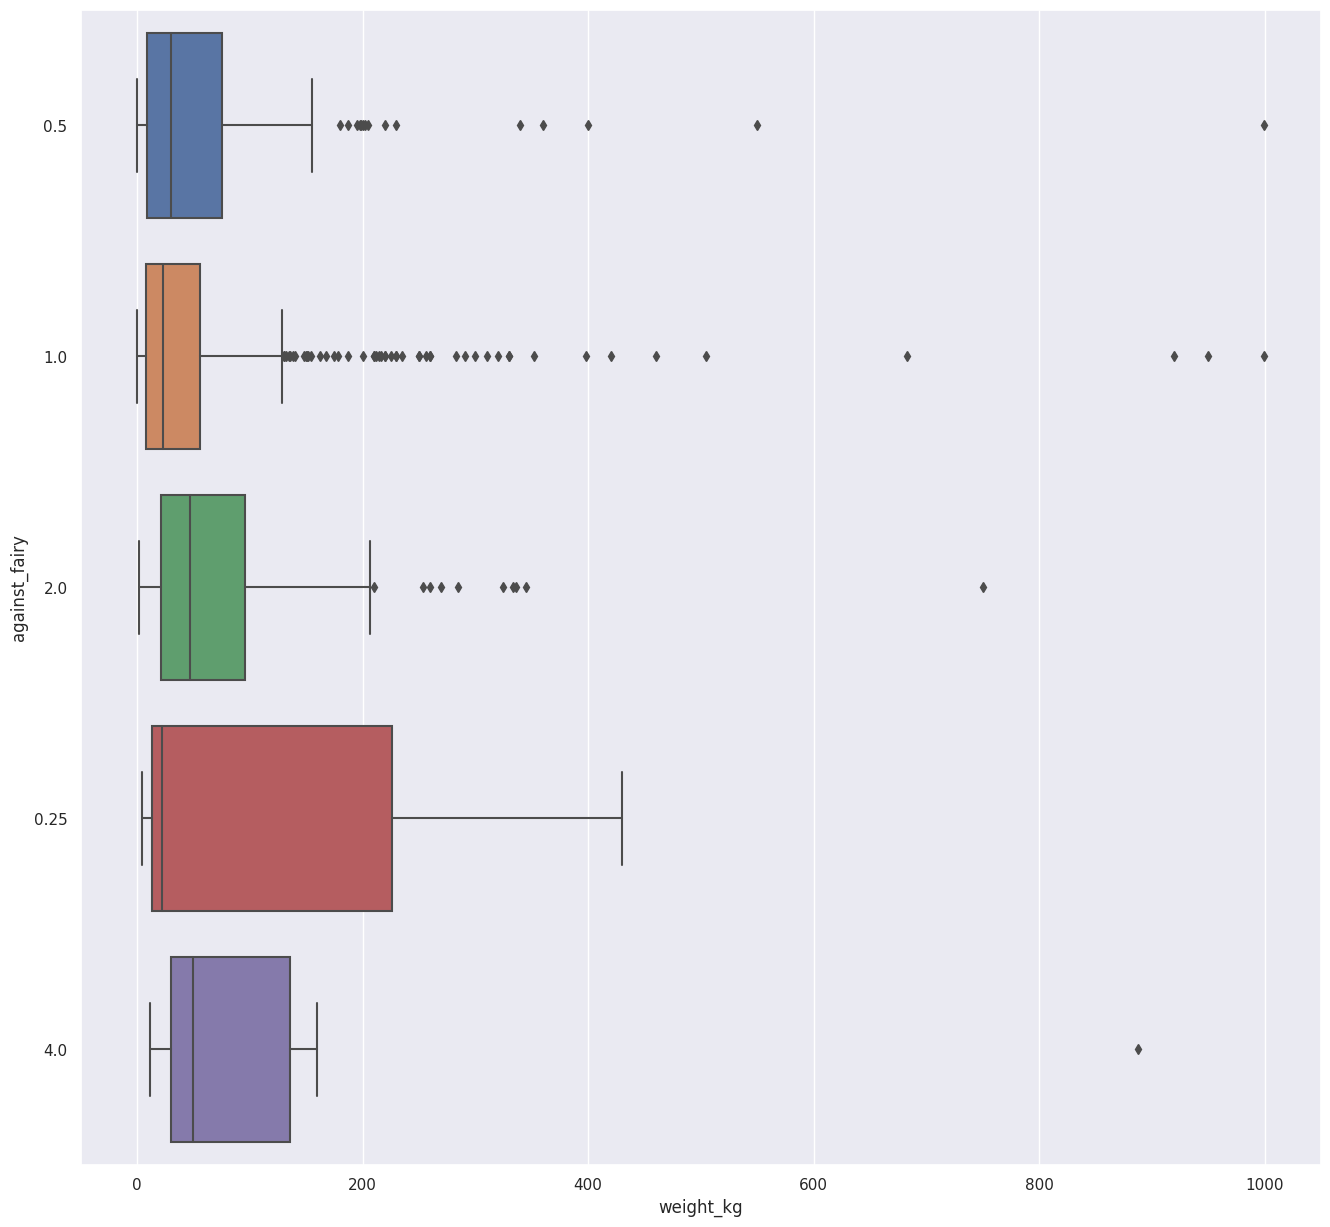

In [21]:
pokedata['against_fairy'] = pokedata['against_fairy'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_fairy', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_fight'>

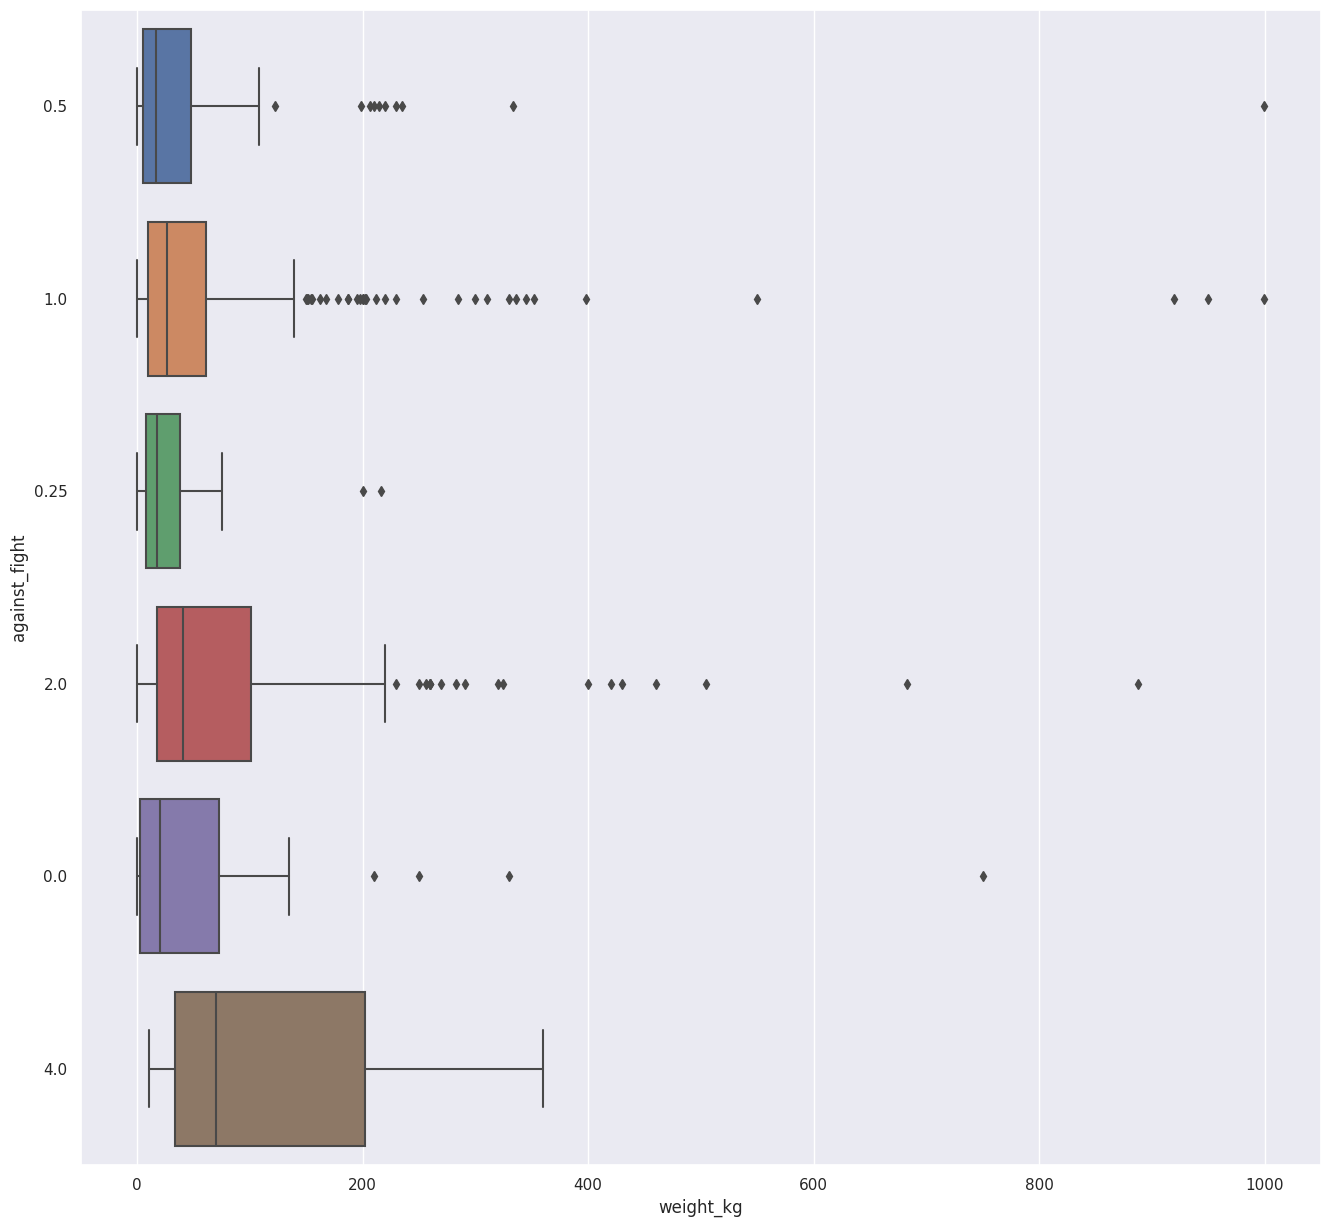

In [22]:
pokedata['against_fight'] = pokedata['against_fight'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_fight', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_fire'>

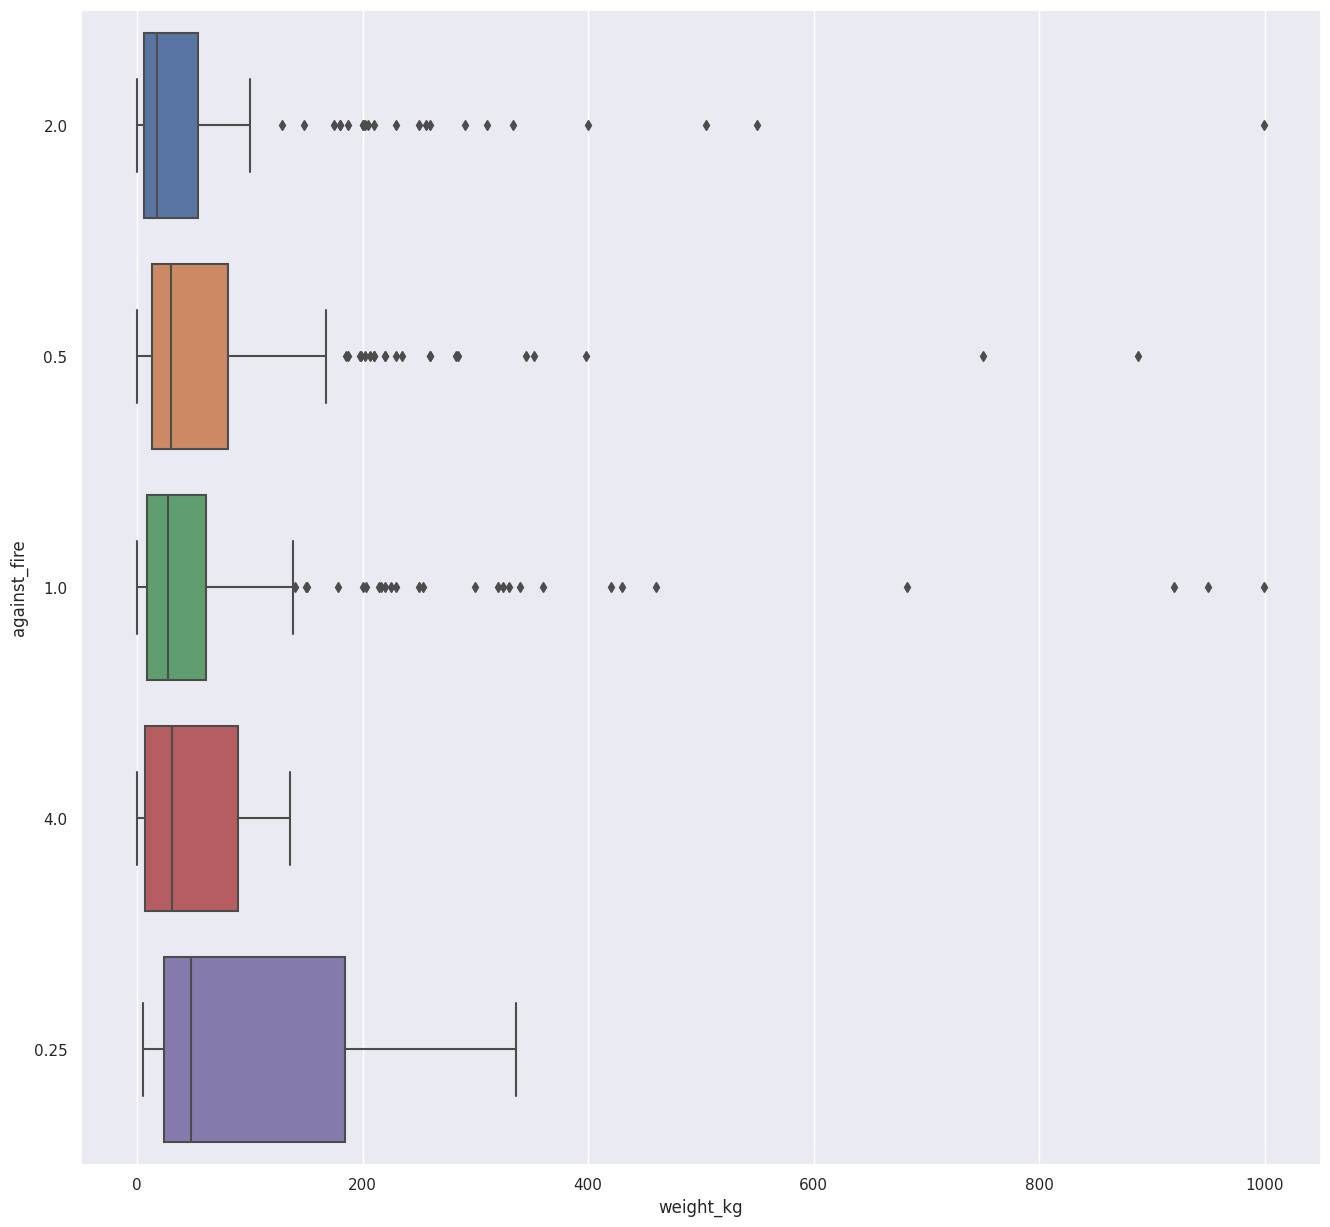

In [23]:
pokedata['against_fire'] = pokedata['against_fire'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_fire', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_flying'>

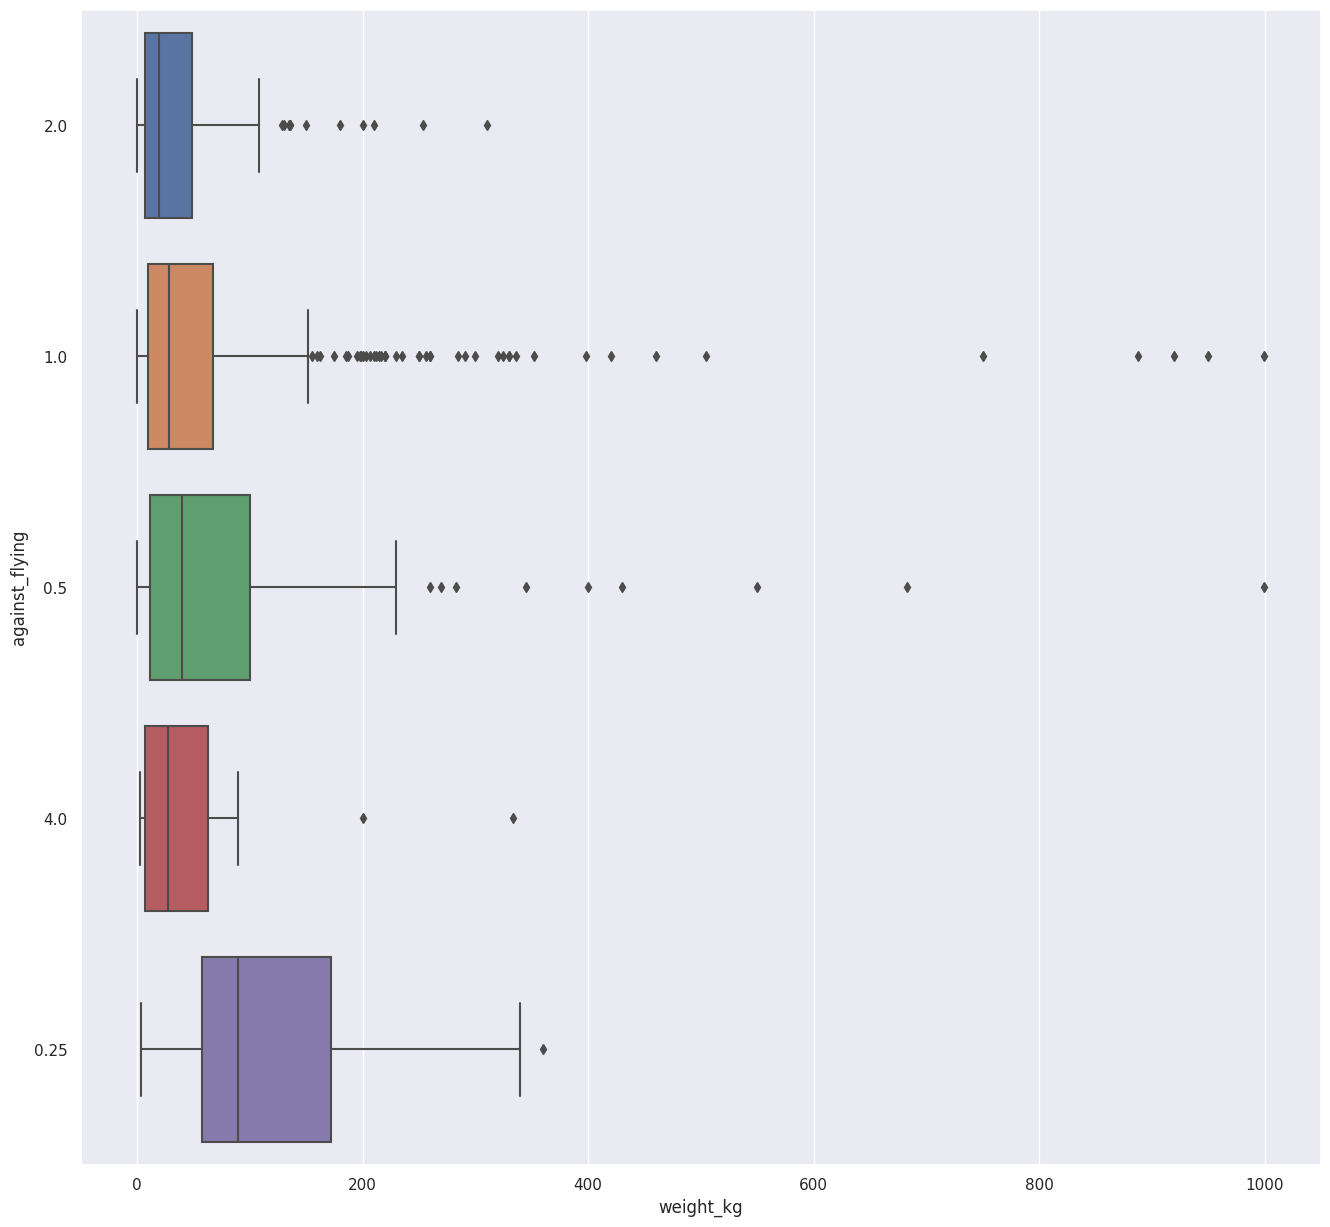

In [24]:
pokedata['against_flying'] = pokedata['against_flying'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_flying', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_ghost'>

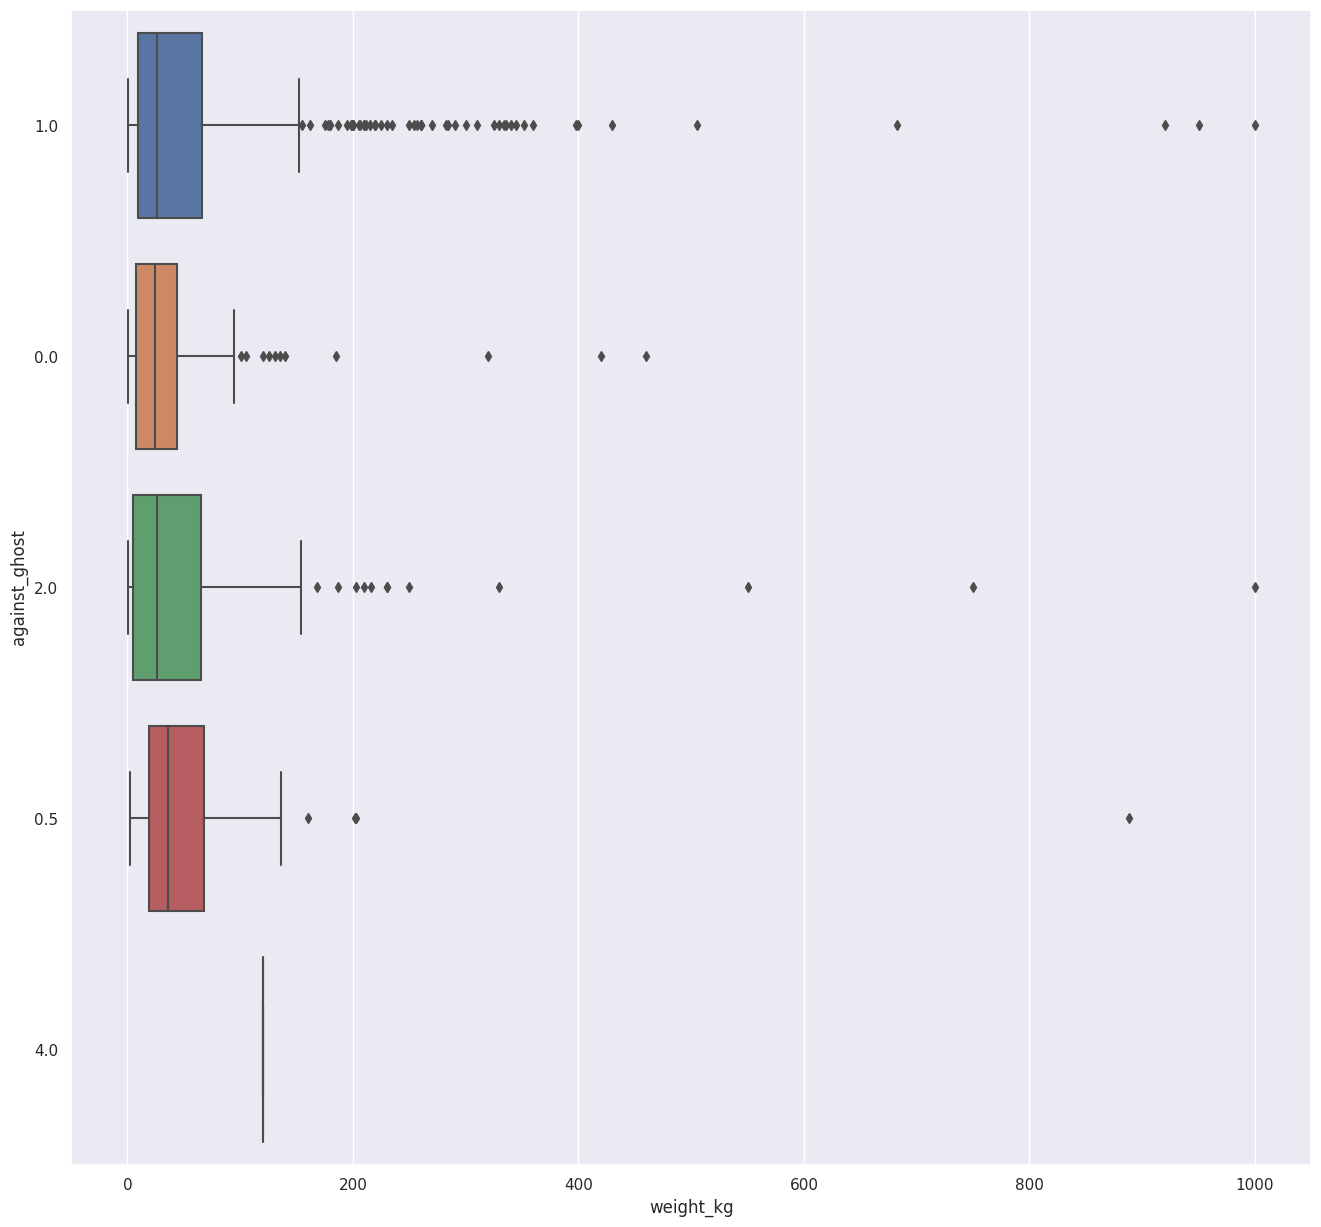

In [25]:
pokedata['against_ghost'] = pokedata['against_ghost'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_ghost', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_grass'>

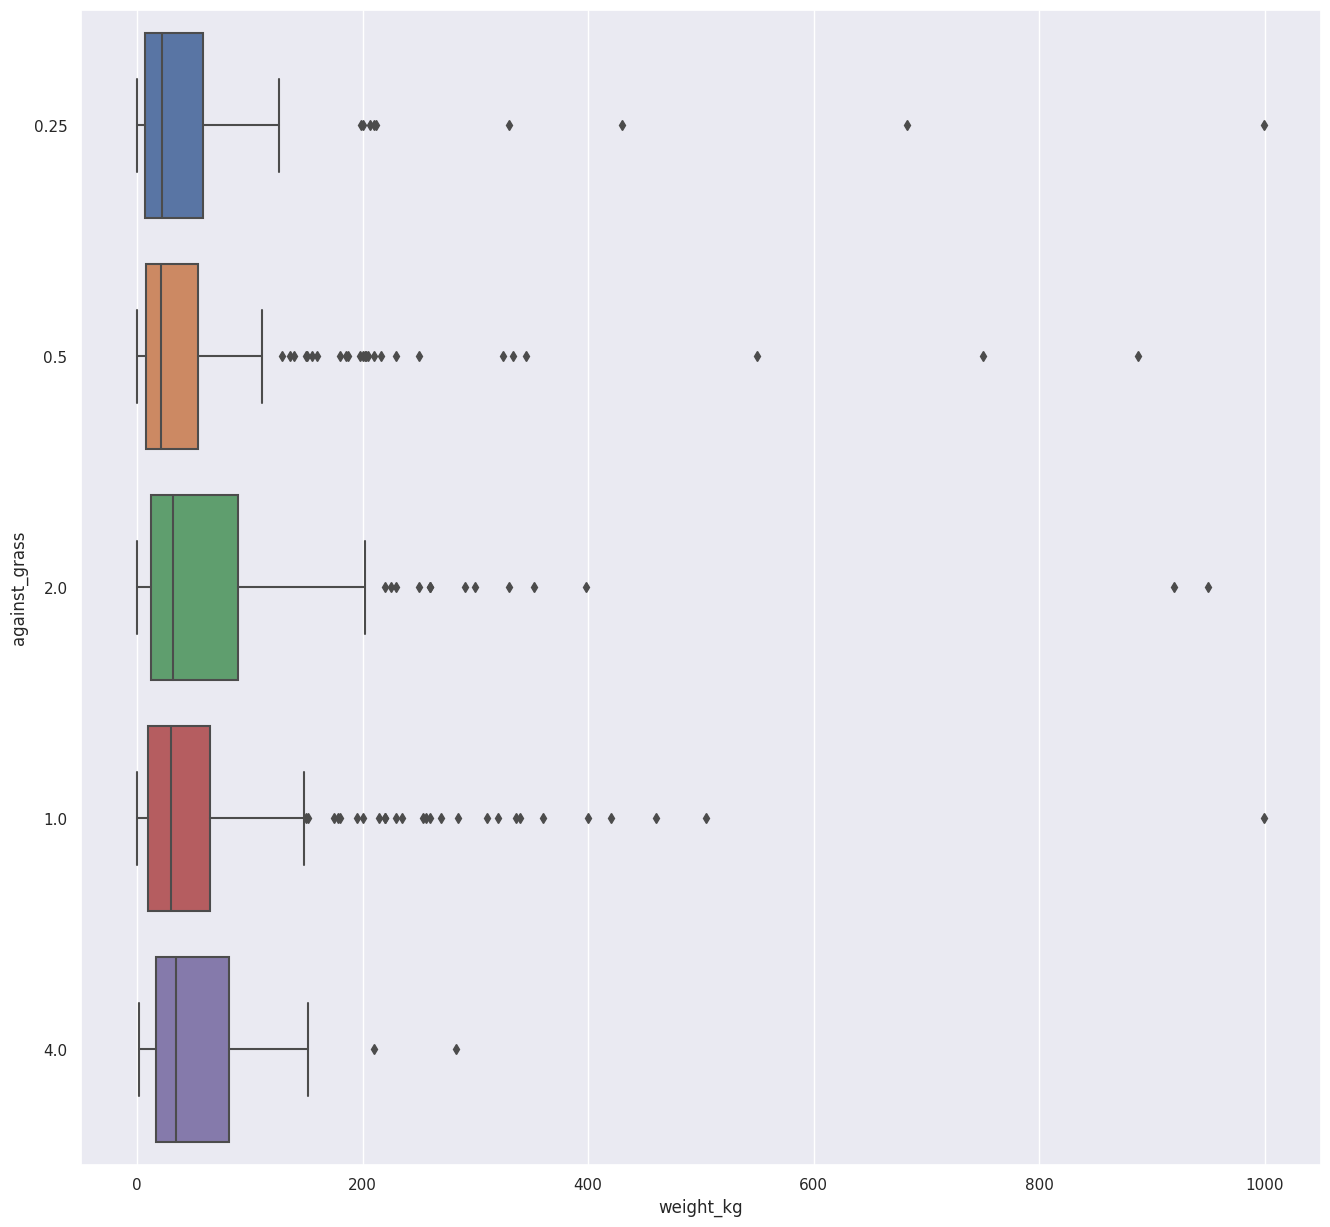

In [26]:
pokedata['against_grass'] = pokedata['against_grass'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_grass', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_ground'>

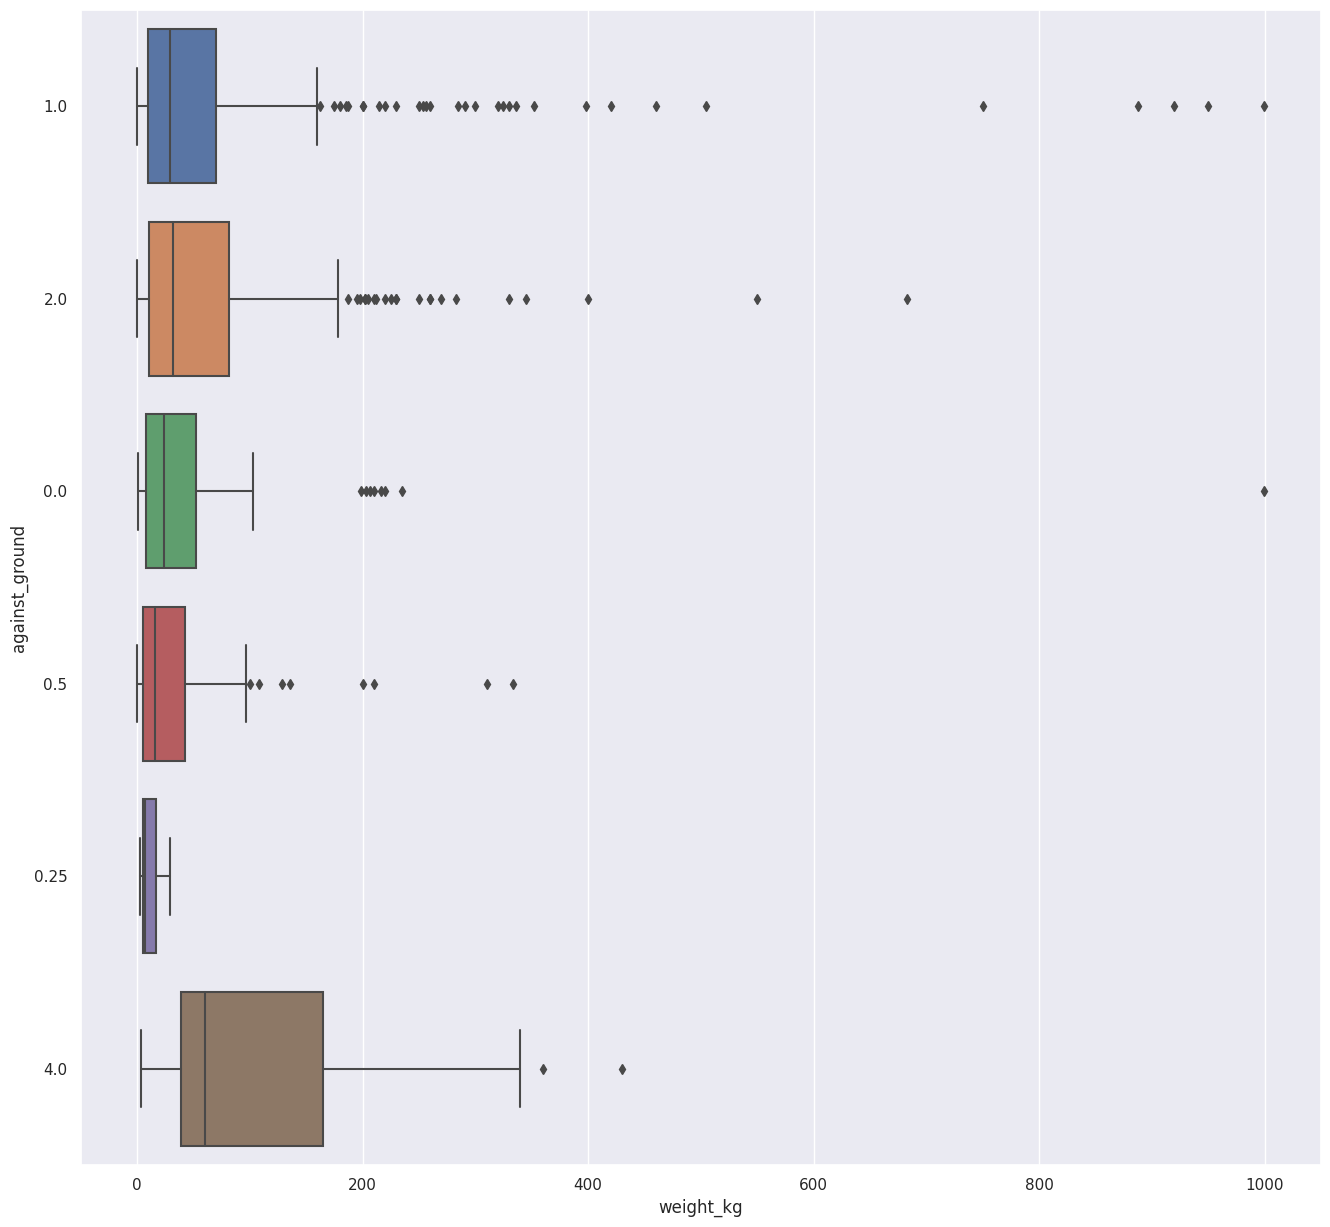

In [27]:
pokedata['against_ground'] = pokedata['against_ground'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_ground', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_ice'>

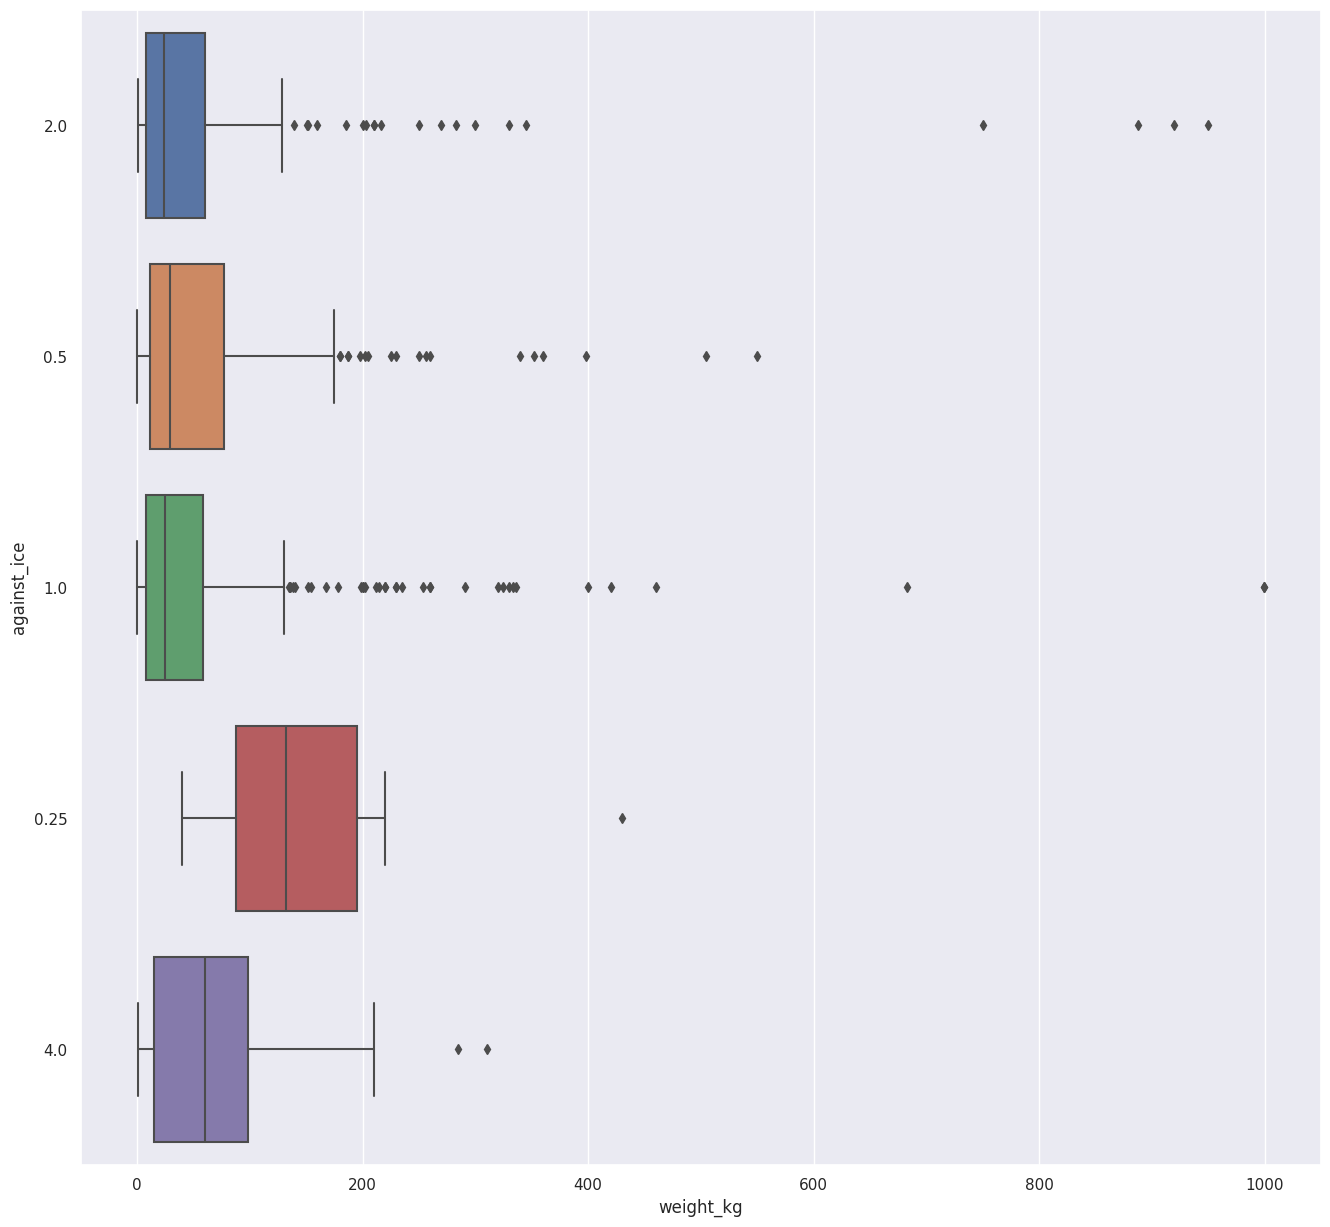

In [28]:
pokedata['against_ice'] = pokedata['against_ice'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_ice', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_normal'>

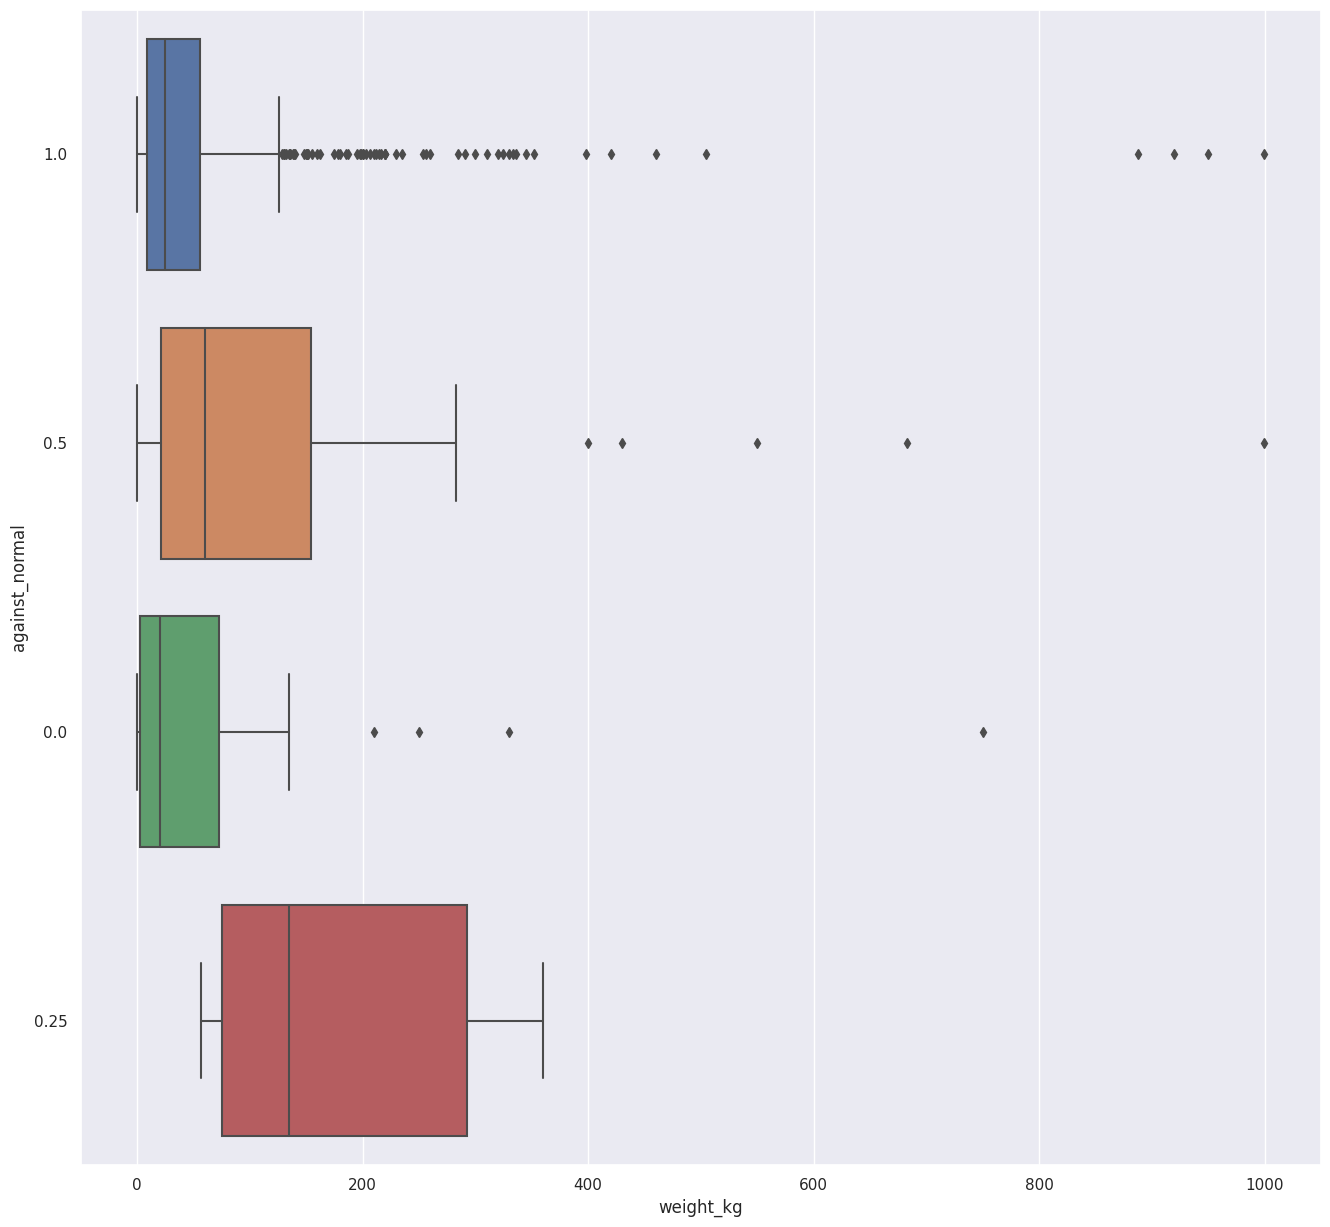

In [29]:
pokedata['against_normal'] = pokedata['against_normal'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_normal', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_poison'>

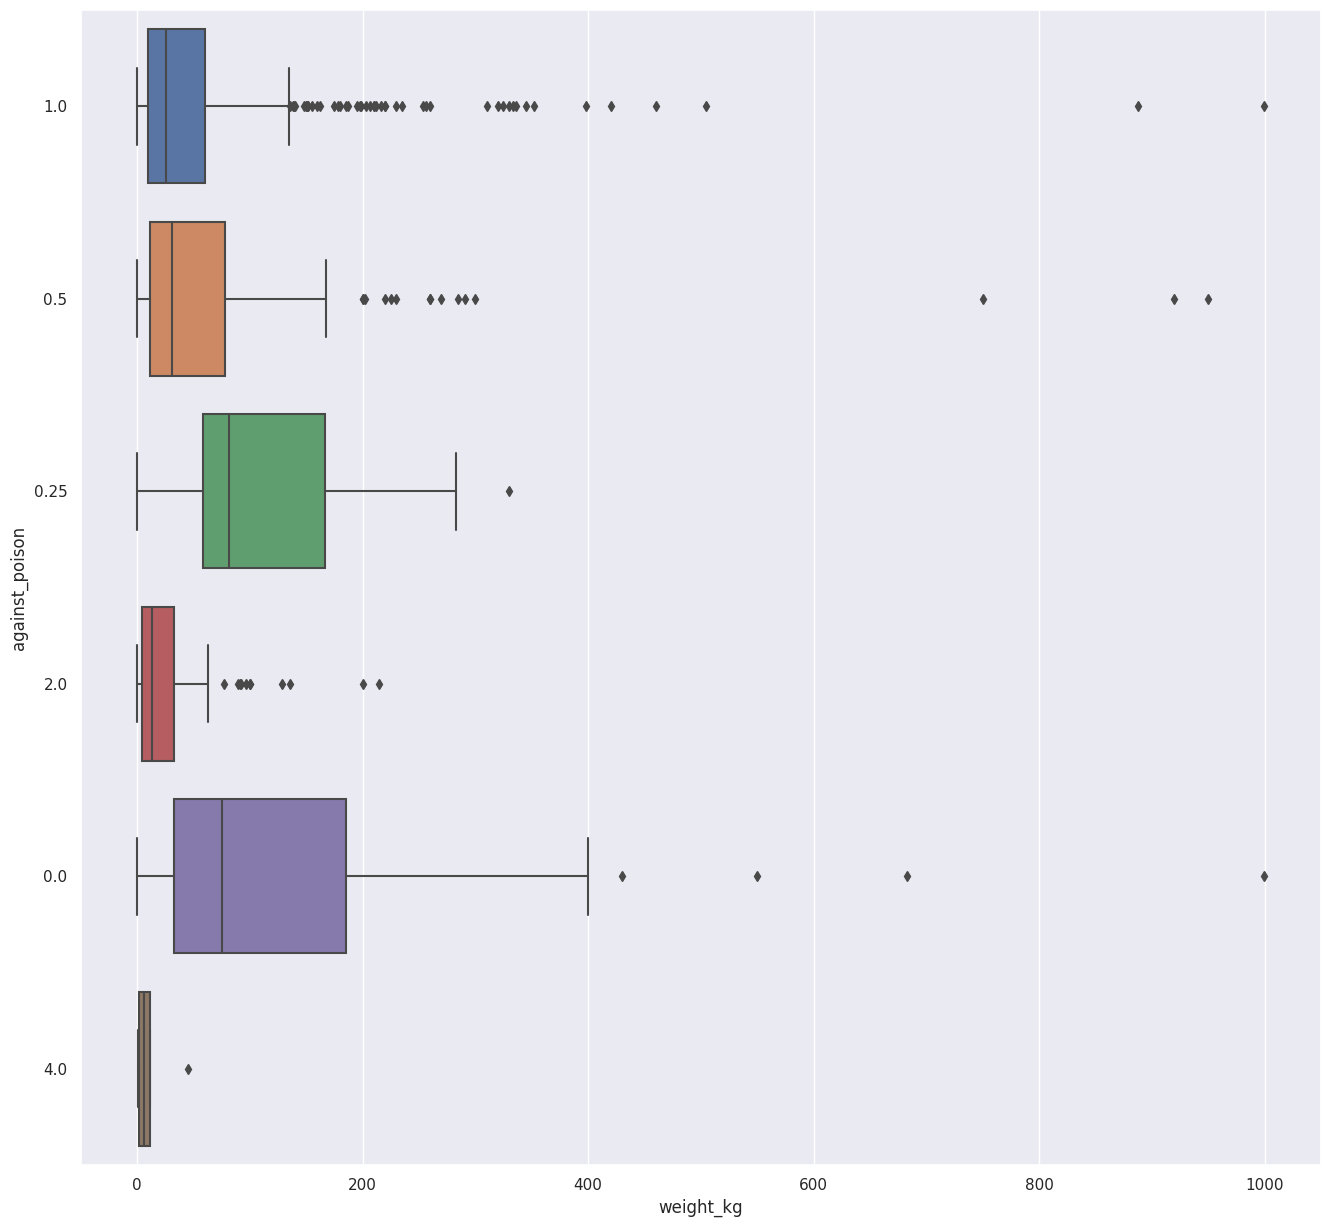

In [30]:
pokedata['against_poison'] = pokedata['against_poison'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_poison', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_psychic'>

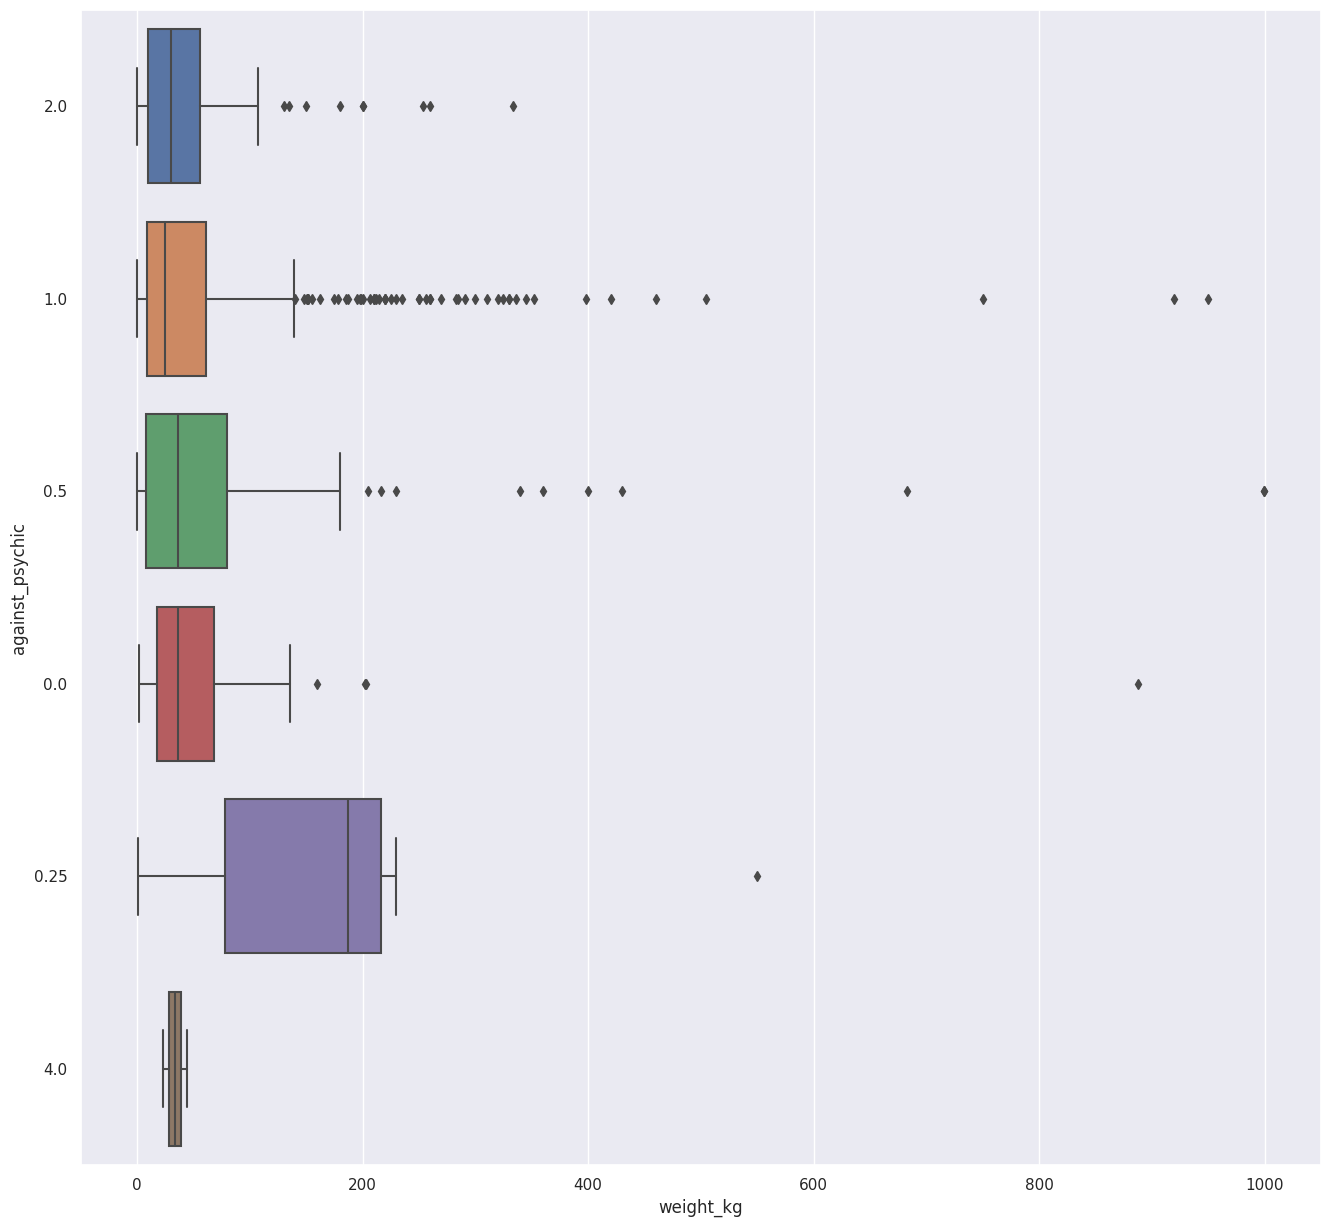

In [31]:
pokedata['against_psychic'] = pokedata['against_psychic'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_psychic', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_rock'>

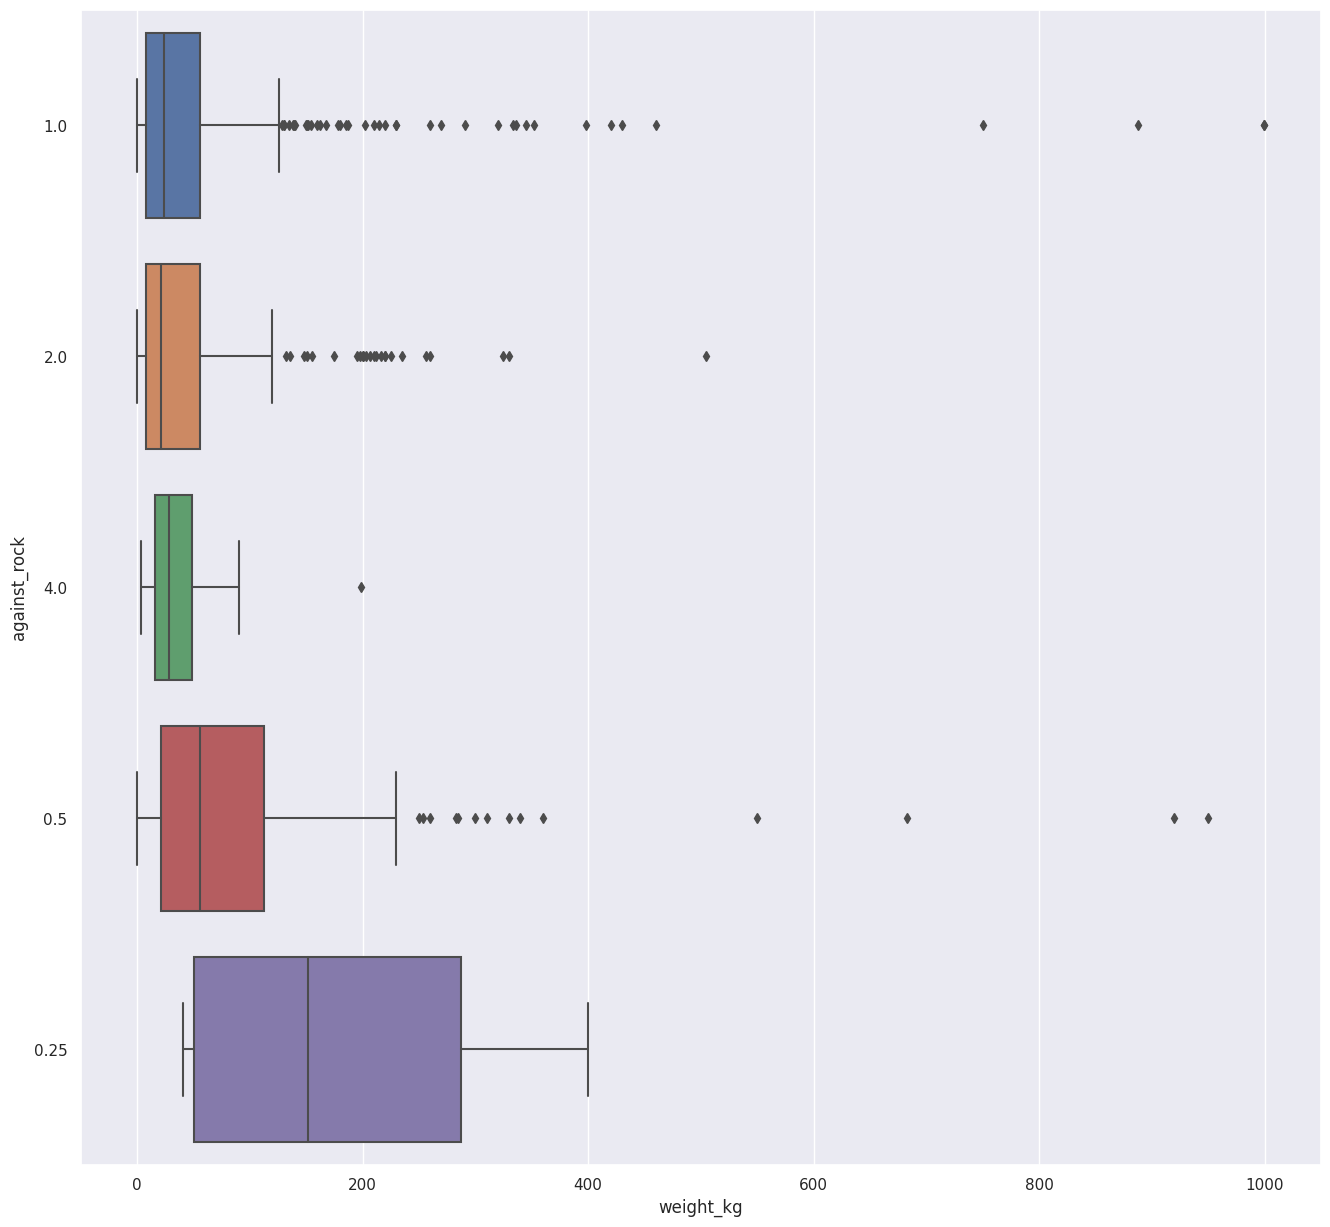

In [32]:
pokedata['against_rock'] = pokedata['against_rock'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_rock', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_steel'>

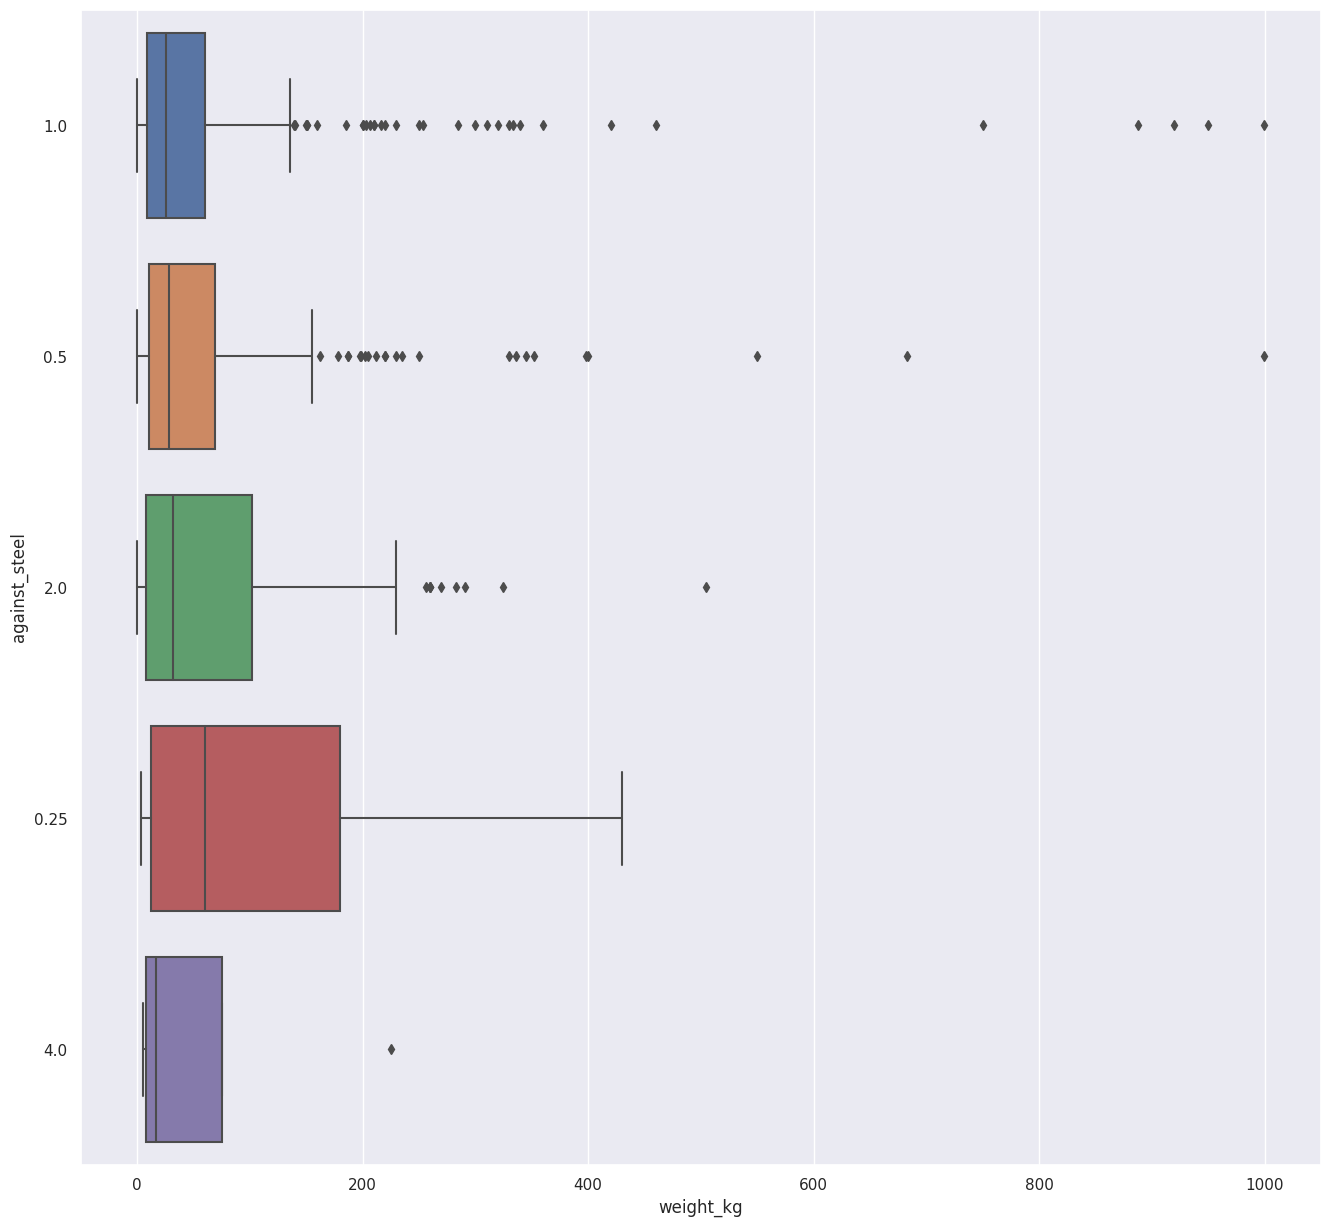

In [33]:
pokedata['against_steel'] = pokedata['against_steel'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_steel', orient="h")

<Axes: xlabel='weight_kg', ylabel='against_water'>

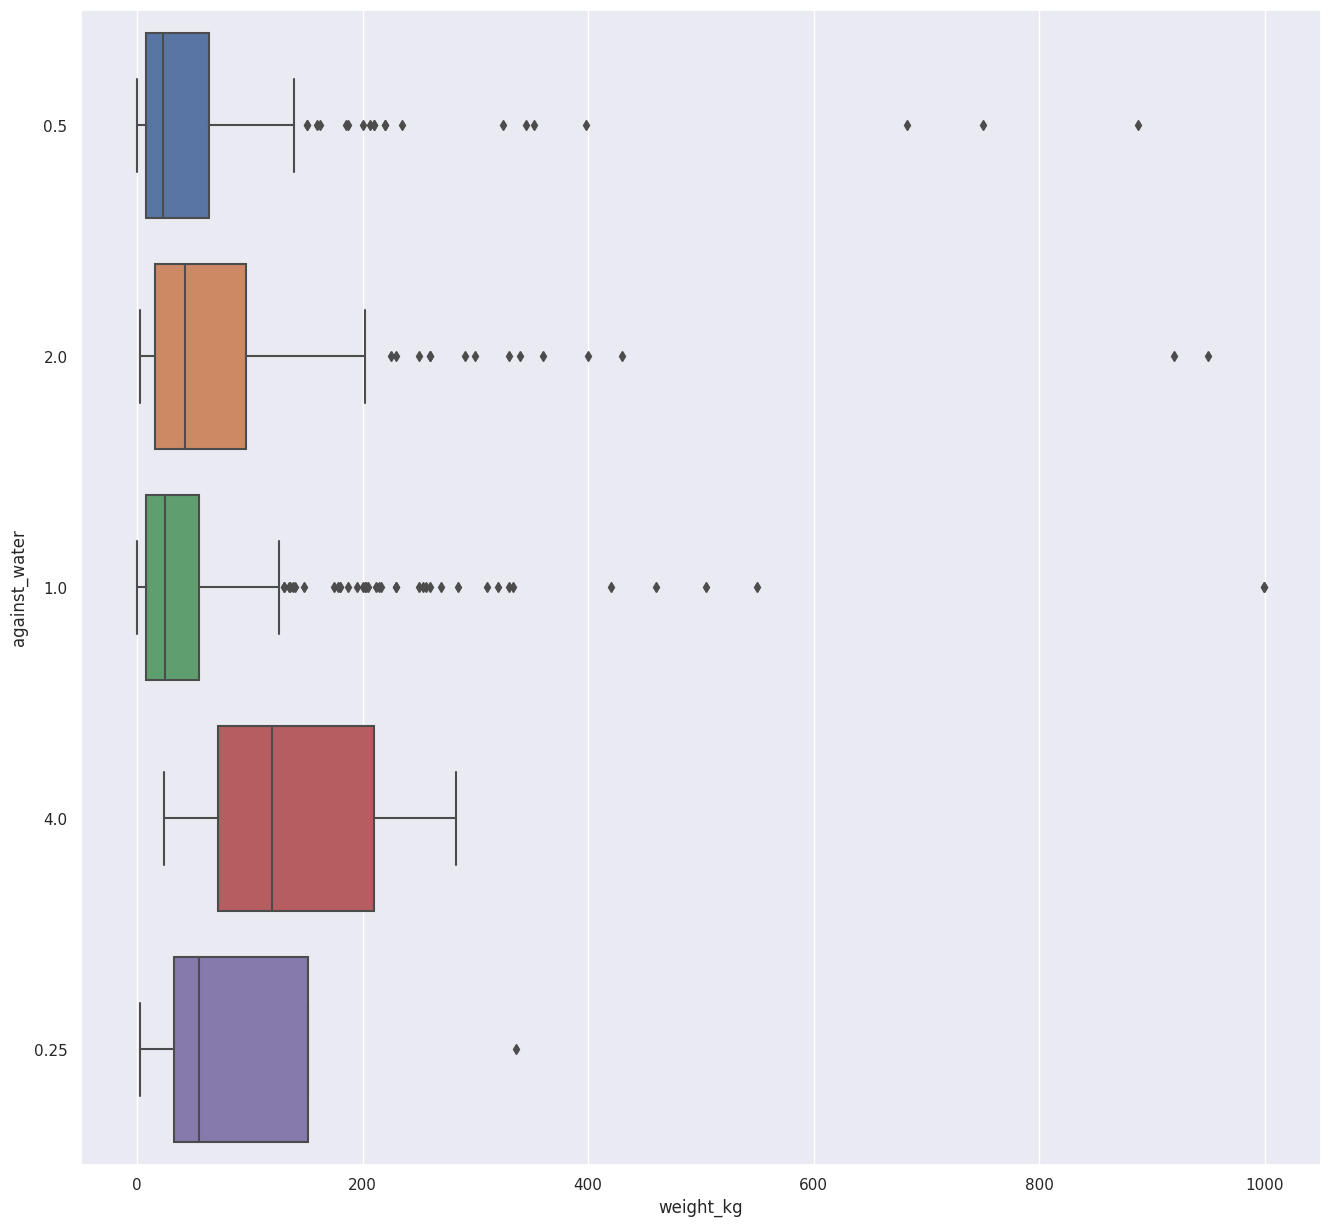

In [34]:
pokedata['against_water'] = pokedata['against_water'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='against_water', orient="h")

<Axes: xlabel='weight_kg', ylabel='base_happiness'>

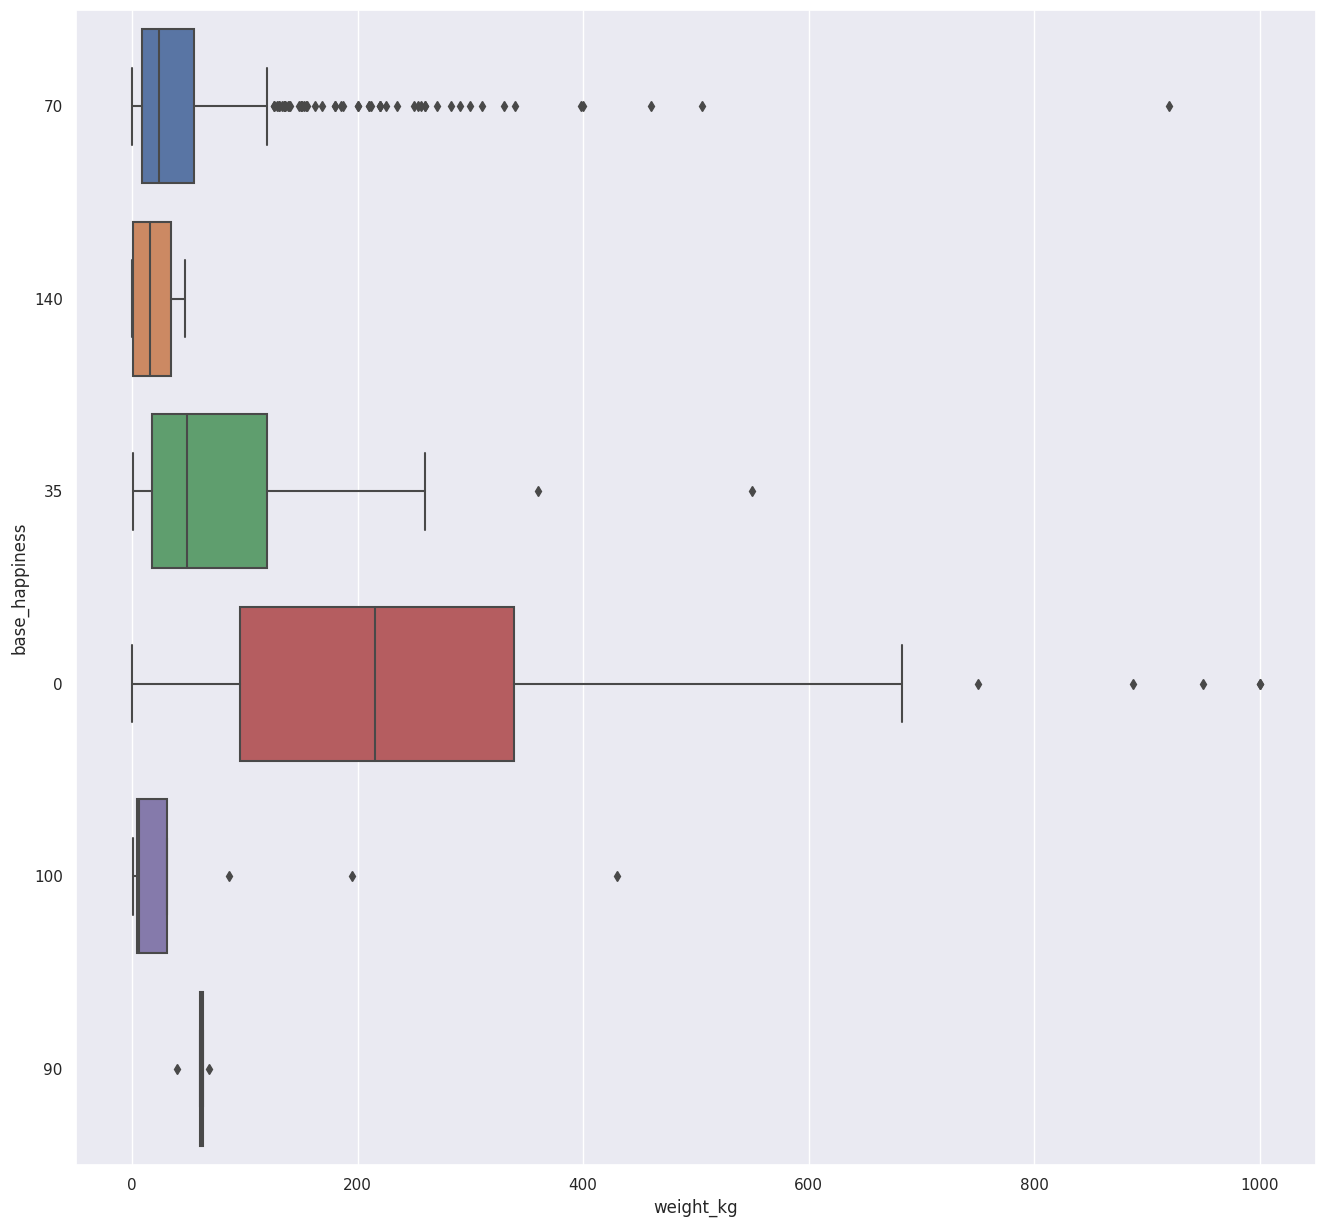

In [35]:
pokedata['base_happiness'] = pokedata['base_happiness'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='base_happiness', orient="h")

<Axes: xlabel='weight_kg', ylabel='base_egg_steps'>

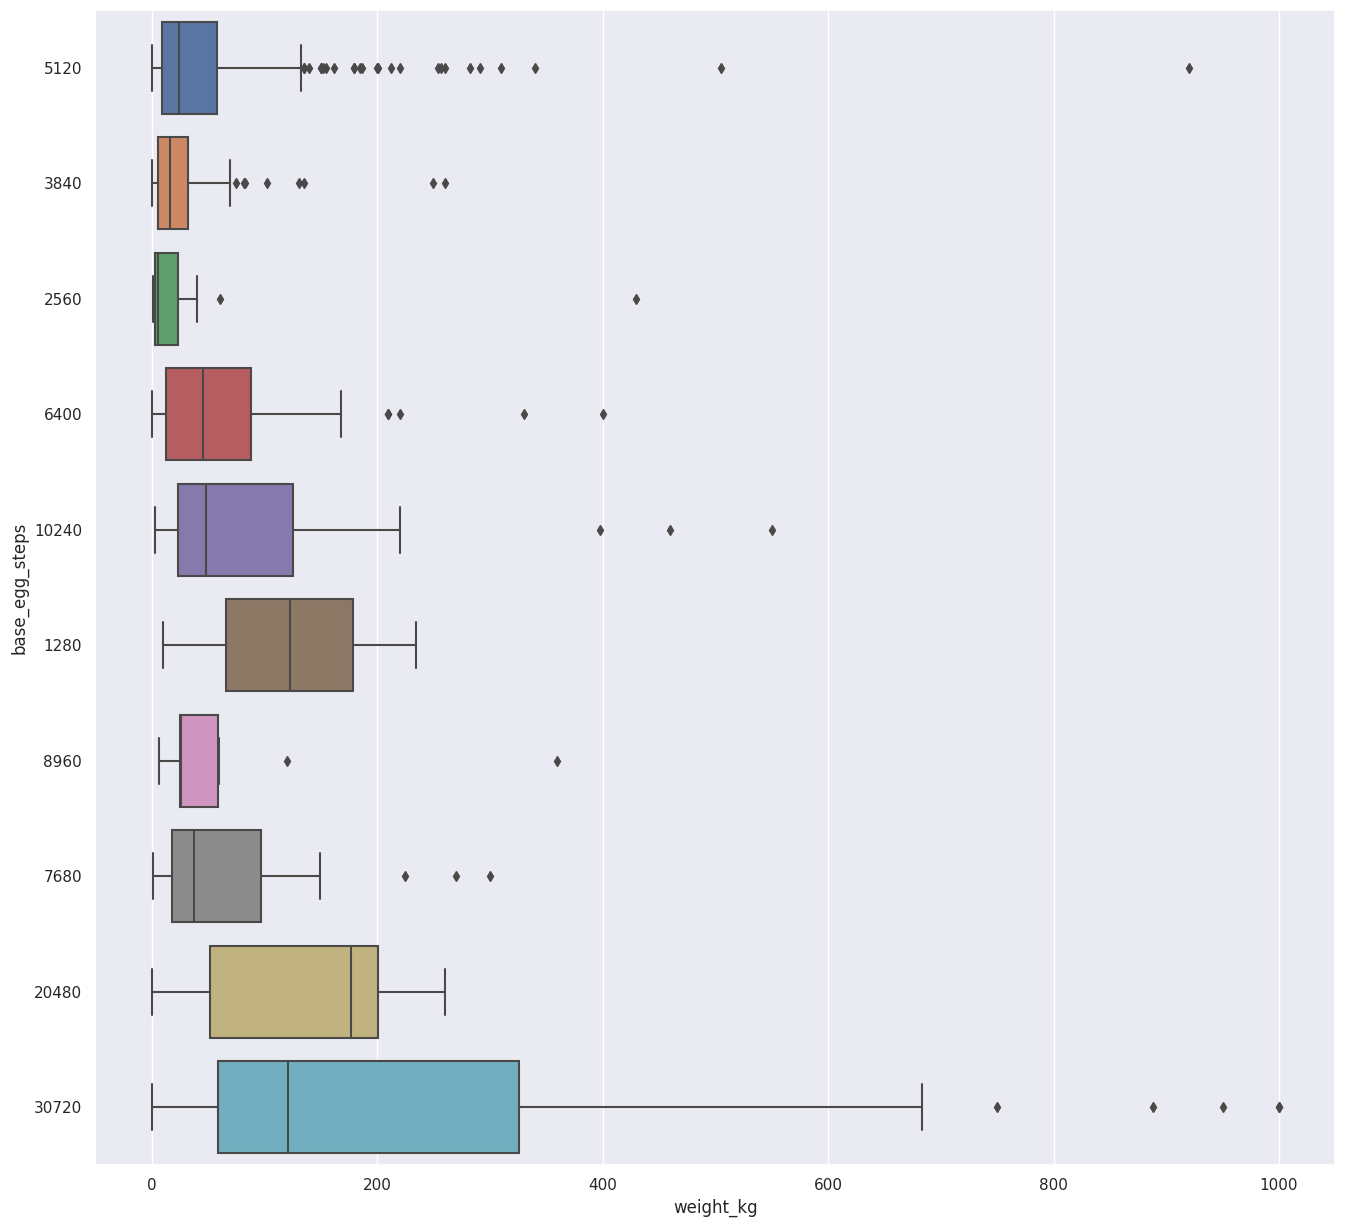

In [36]:
pokedata['base_egg_steps'] = pokedata['base_egg_steps'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='base_egg_steps', orient="h")

<Axes: xlabel='weight_kg', ylabel='is_legendary'>

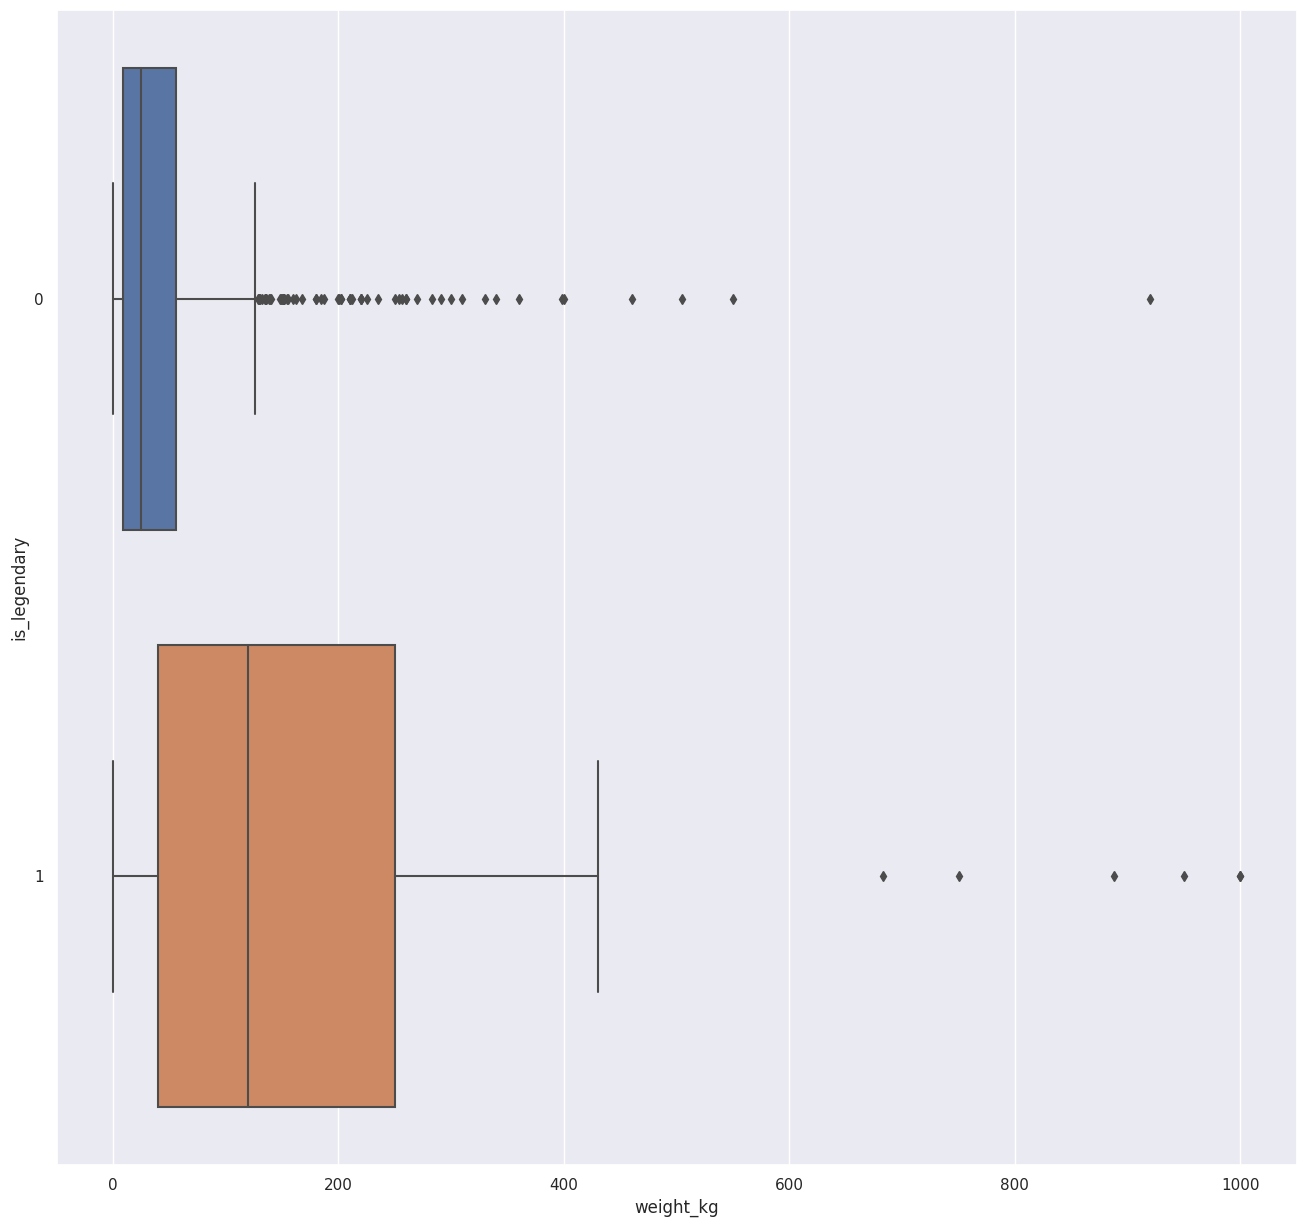

In [37]:
pokedata['is_legendary'] = pokedata['is_legendary'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='is_legendary', orient="h")

<Axes: xlabel='weight_kg', ylabel='generation'>

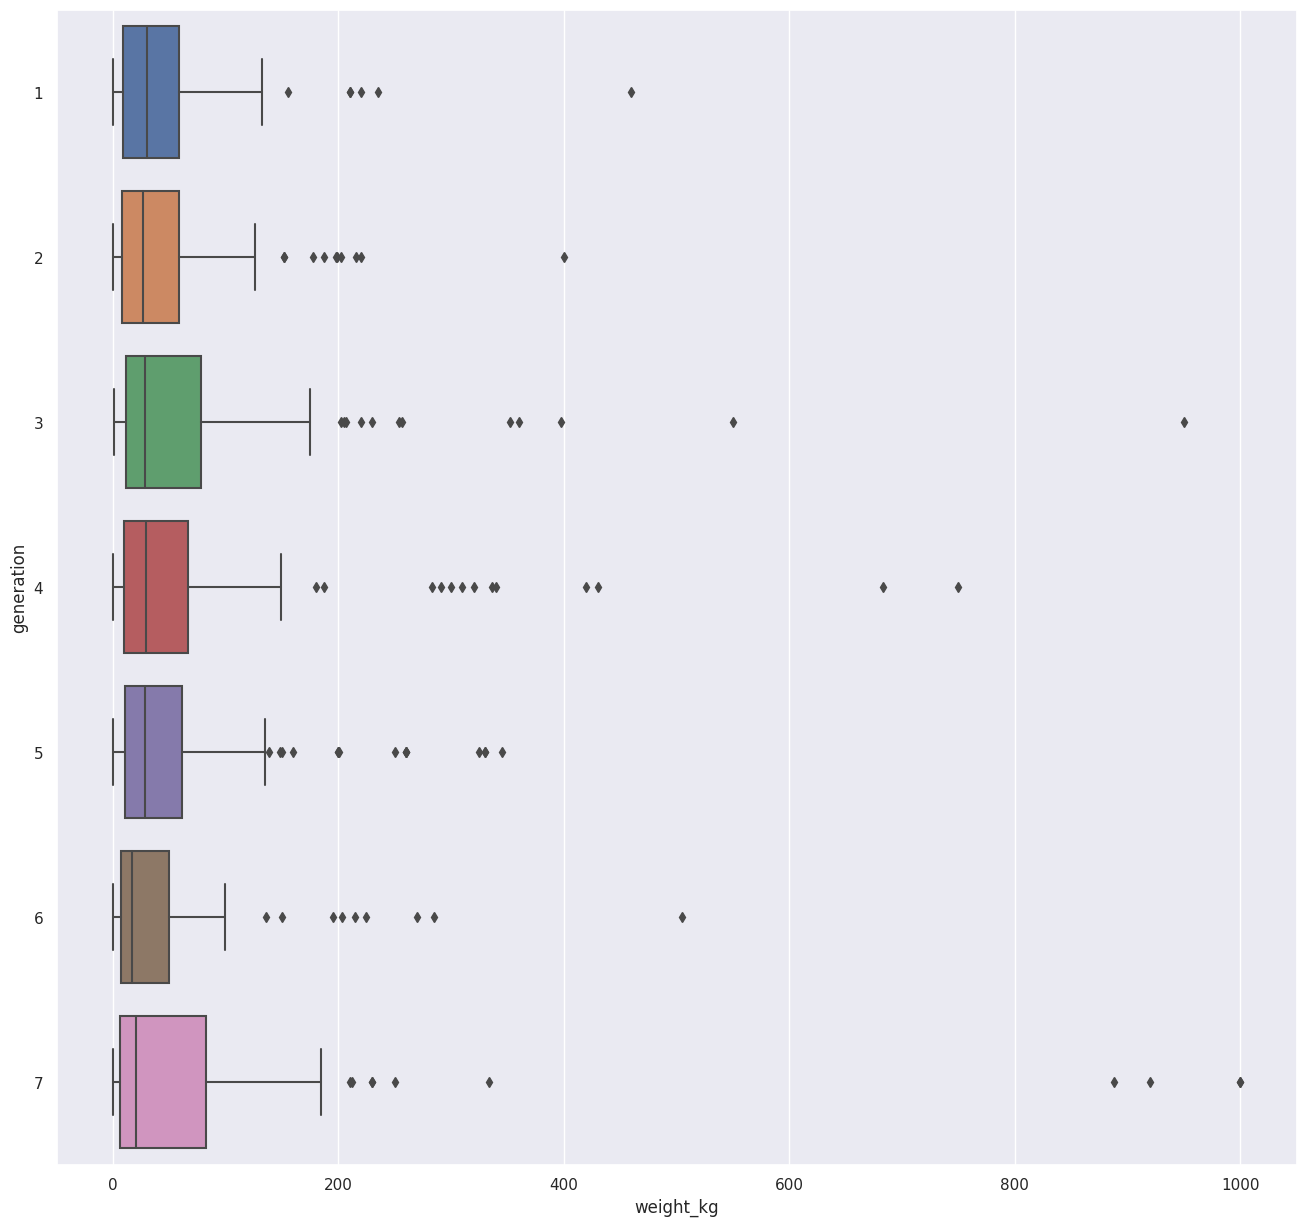

In [38]:
pokedata['generation'] = pokedata['generation'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='generation', orient="h")

<Axes: xlabel='weight_kg', ylabel='type1'>

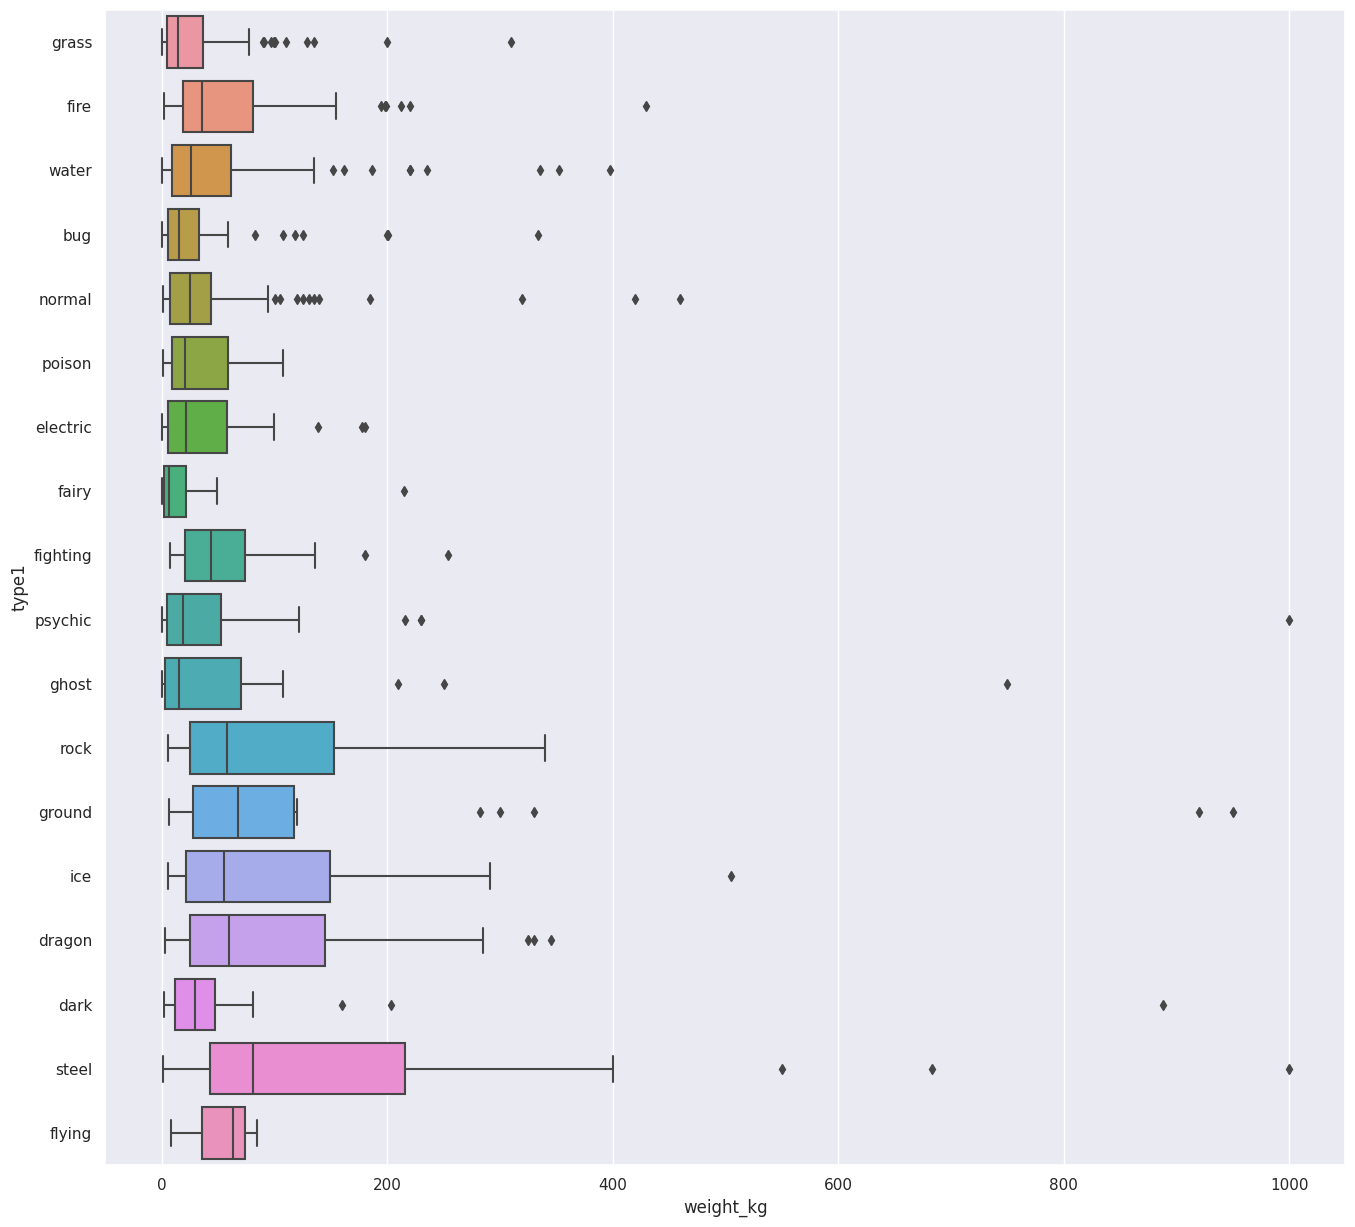

In [39]:
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='type1', orient="h")

<Axes: xlabel='weight_kg', ylabel='type2'>

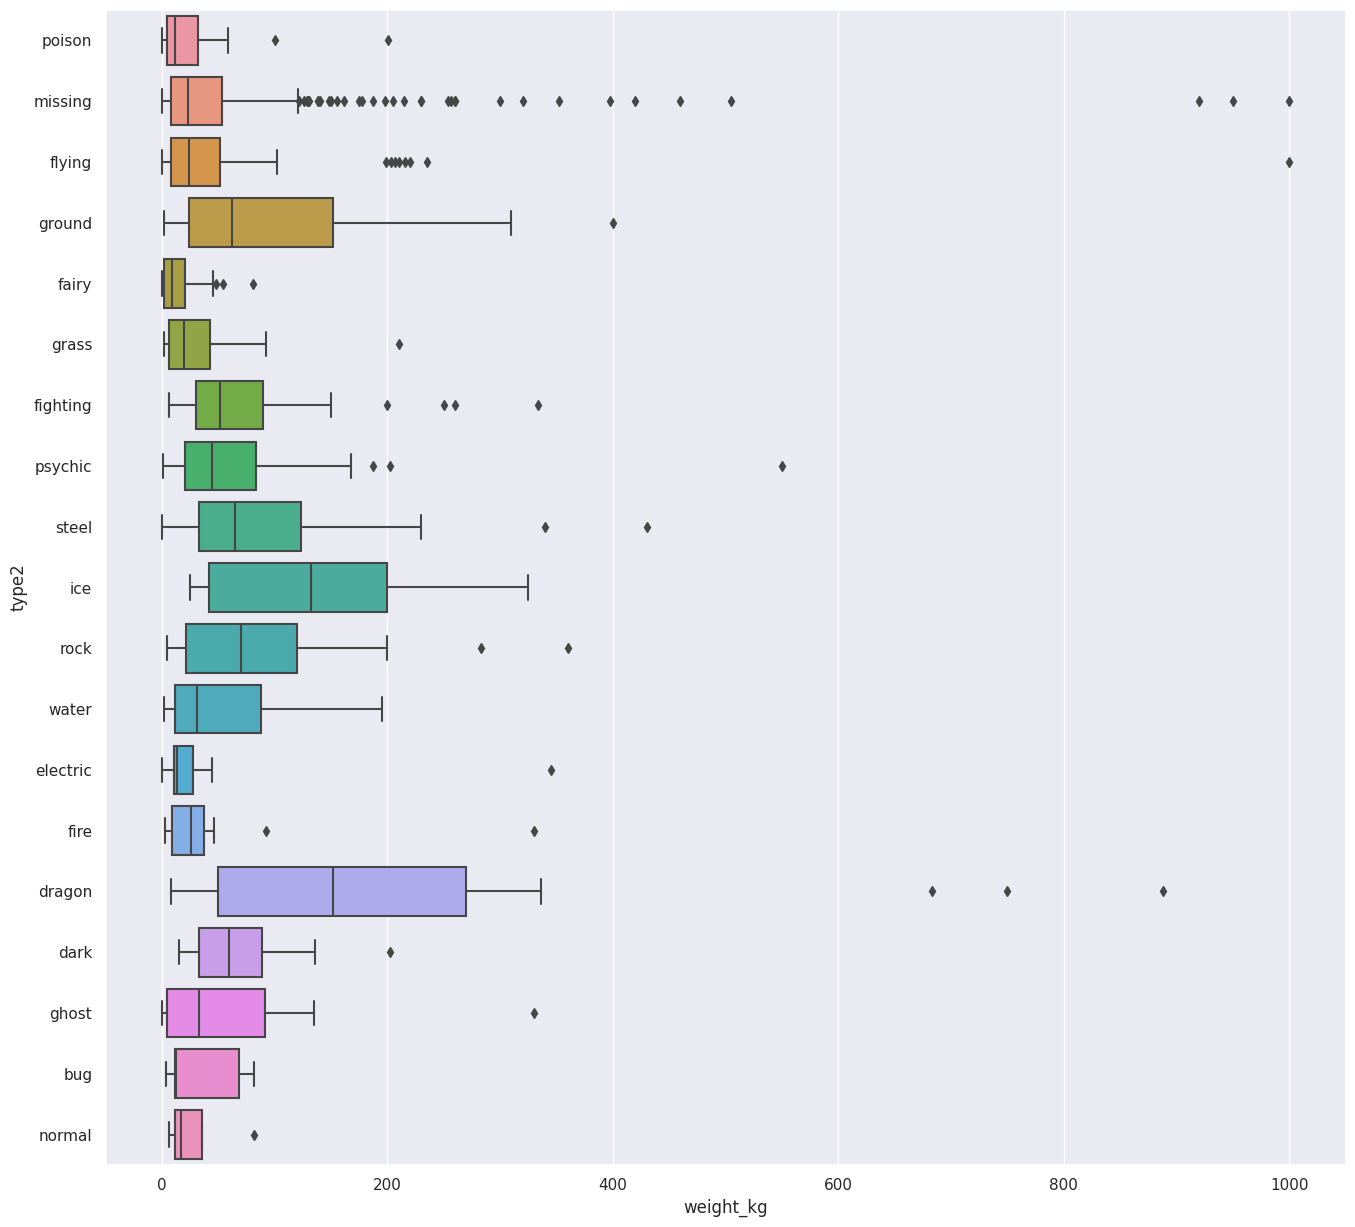

In [40]:
pokedata['type2'].fillna('missing', inplace=True)
pokedata['type2'] = pokedata['type2'].astype(str)
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='type2', orient="h")

<Axes: xlabel='weight_kg', ylabel='experience_growth'>

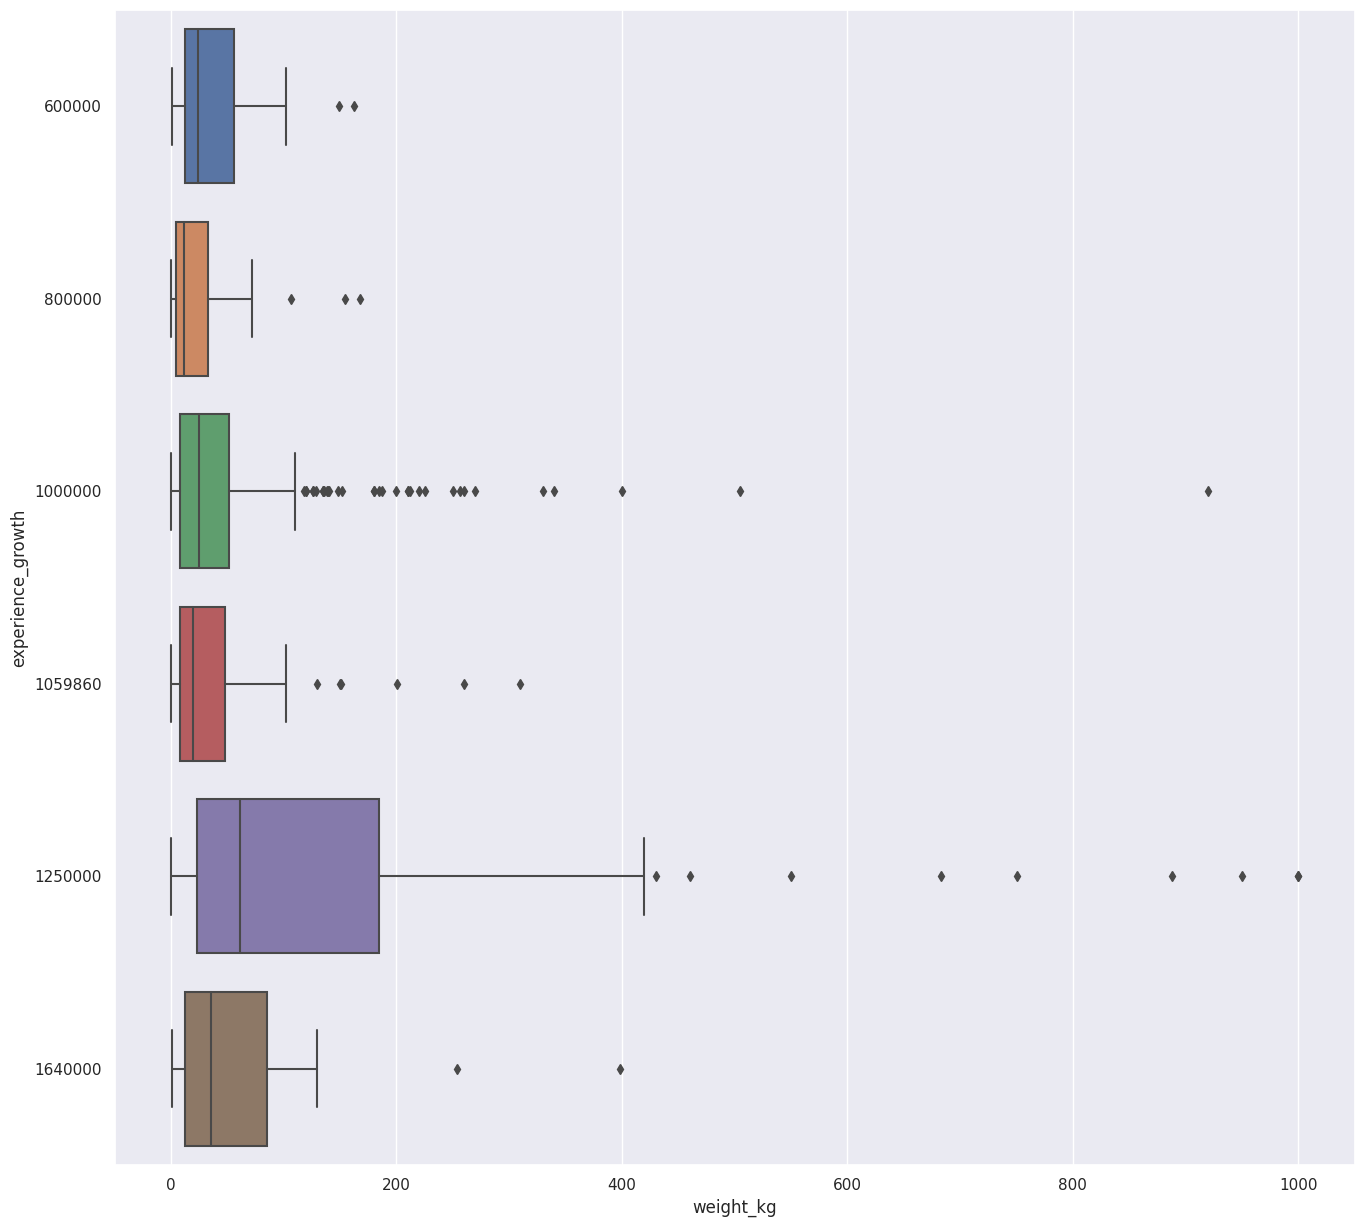

In [41]:
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata, x='weight_kg', y='experience_growth', orient="h")

# **Dropped numerical and categorical variables that were deemed insignificant in predicting weight**

In [42]:
pokedata = pokedata.drop(['sp_attack','speed','base_total', 'percentage_male','classfication','abilities','against_bug','against_dark','against_fire','against_flying','against_ghost','against_grass','generation','levitate'], axis = 1)

In [43]:
pokedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 800
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_dragon     780 non-null    object 
 1   against_electric   780 non-null    object 
 2   against_fairy      780 non-null    object 
 3   against_fight      780 non-null    object 
 4   against_ground     780 non-null    object 
 5   against_ice        780 non-null    object 
 6   against_normal     780 non-null    object 
 7   against_poison     780 non-null    object 
 8   against_psychic    780 non-null    object 
 9   against_rock       780 non-null    object 
 10  against_steel      780 non-null    object 
 11  against_water      780 non-null    object 
 12  attack             780 non-null    int64  
 13  base_egg_steps     780 non-null    object 
 14  base_happiness     780 non-null    object 
 15  capture_rate       780 non-null    int64  
 16  defense            780 non

# **Grouped certain values in certain categorical variables as one as they have similar boxplots**

In [44]:
pokedata['against_dragon_cat'] = pokedata["against_dragon"].apply(lambda x: '1' if x in ['0.5','2.0'] else '0')

pokedata['against_electric_cat'] = pokedata["against_electric"].apply(lambda x: x if x in ['0.0','4.0'] else '1')

pokedata['against_fairy_cat'] = pokedata["against_fairy"].apply(lambda x: x if x in ['0.25','2.0','4.0'] else '0')

pokedata['against_ice_cat'] = pokedata["against_ice"].apply(lambda x: x if x in ['0.25','4.0'] else '0')

pokedata['against_normal_cat'] = pokedata["against_normal"].apply(lambda x: x if x in ['0.25','0.5'] else '0')

pokedata['against_psychic_cat'] = pokedata["against_psychic"].apply(lambda x: '1' if x == '0.25' else '0')

pokedata['against_rock_cat'] = pokedata["against_rock"].apply(lambda x: x if x in ['0.25','0.5'] else '0')

pokedata['against_steel_cat'] = pokedata["against_steel"].apply(lambda x: '1' if x == '0.25' else '0')

pokedata['against_water_cat'] = pokedata["against_water"].apply(lambda x: x if x in ['0.25','2.0','4.0'] else '0')

pokedata['base_happiness_cat'] = pokedata["base_happiness"].apply(lambda x: x if x in ['0','35'] else '1')

pokedata['experience_growth_cat'] = pokedata["experience_growth"].apply(lambda x: '1' if x == 1250000 else '0')

pokedata['type1_cat'] = pokedata['type1'].apply(lambda x: '1' if x in ['rock','ground','ice','dragon','steel'] else '0')

pokedata['type2_cat'] = pokedata["type2"].apply(lambda x: '1' if x in['ground','ice','dragon','steel','rock'] else '0')

# **Used OneHotEncoder to split categorical values into new separate columns**

# **Combined these new columns with numerical columns including weight to create a clean and prepared dataframe for regression**

In [45]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary')

# OneHotEncoding of categorical predictors (not the response)
pokedata_cat = pokedata[['against_dragon_cat','against_electric_cat','against_fairy_cat','against_fight','against_ground','against_ice_cat',\
                         'against_normal_cat', 'against_poison', 'against_psychic_cat', 'against_rock_cat', 'against_steel_cat', 'against_water_cat',\
                         'base_happiness_cat', 'base_egg_steps', 'is_legendary', 'experience_growth_cat', 'type1_cat', 'type2_cat']]
ohe.fit(pokedata_cat)
pokedata_cat_ohe = pd.DataFrame(ohe.transform(pokedata_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(pokedata_cat.columns))

# Check the encoded variables
pokedata_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   against_dragon_cat_1      780 non-null    float64
 1   against_electric_cat_0.0  780 non-null    float64
 2   against_electric_cat_1    780 non-null    float64
 3   against_electric_cat_4.0  780 non-null    float64
 4   against_fairy_cat_0       780 non-null    float64
 5   against_fairy_cat_0.25    780 non-null    float64
 6   against_fairy_cat_2.0     780 non-null    float64
 7   against_fairy_cat_4.0     780 non-null    float64
 8   against_fight_0.0         780 non-null    float64
 9   against_fight_0.25        780 non-null    float64
 10  against_fight_0.5         780 non-null    float64
 11  against_fight_1.0         780 non-null    float64
 12  against_fight_2.0         780 non-null    float64
 13  against_fight_4.0         780 non-null    float64
 14  against_gr

In [46]:
pokedata_num = pokedata[['attack','capture_rate','defense', 'height_m', 'hp', 'sp_defense']]
pokedata_res = pokedata['weight_kg']
pokedata_ohe = pd.concat([pokedata_num, pokedata_cat_ohe.set_axis(pokedata_num.index), pokedata_res.set_axis(pokedata_num.index)], 
                           sort = False, axis = 1).reindex(index=pokedata.index)
pokedata_ohe.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 800
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attack                    780 non-null    int64  
 1   capture_rate              780 non-null    int64  
 2   defense                   780 non-null    int64  
 3   height_m                  780 non-null    float64
 4   hp                        780 non-null    int64  
 5   sp_defense                780 non-null    int64  
 6   against_dragon_cat_1      780 non-null    float64
 7   against_electric_cat_0.0  780 non-null    float64
 8   against_electric_cat_1    780 non-null    float64
 9   against_electric_cat_4.0  780 non-null    float64
 10  against_fairy_cat_0       780 non-null    float64
 11  against_fairy_cat_0.25    780 non-null    float64
 12  against_fairy_cat_2.0     780 non-null    float64
 13  against_fairy_cat_4.0     780 non-null    float64
 14  against_fi

# **Linear Regression Model**

Intercept of Regression 	: b =  [-52.03845661]
Coefficients of Regression 	: a =  [[-1.34955333e-02  2.47524133e-02  5.31027766e-01  3.76357926e+01
   3.96592281e-01  1.25256852e-02  1.05326376e+01 -1.82057532e+01
  -1.50982479e+01  3.33040011e+01  2.78914712e+01 -3.04912869e+01
   9.11282124e+00 -6.51300553e+00 -1.37022235e+01 -5.20990009e+00
  -7.47882688e+00  5.10193302e+00  4.13457338e+00  1.71544440e+01
  -9.05104419e+00  2.18307851e-01  5.11874804e+00 -3.58623006e+00
  -8.83858670e+00  1.61388050e+01 -2.62938697e-02  2.52057505e+01
  -2.51794567e+01  9.20231123e+00  3.04210175e+00 -1.22444130e+01
  -2.08268812e+01 -5.63635302e+00  1.72064927e+01  6.91663443e+00
   1.02528406e+00  1.31482306e+00  4.63045102e+01  4.19115034e+00
  -2.69841621e+01  2.27930117e+01  1.51640657e+01 -2.51333310e+00
   1.12227515e+00  2.24464296e+01 -2.10553716e+01  9.83976676e+01
  -5.74972796e+01 -4.09003879e+01 -6.30714460e+00 -2.00717175e+01
   5.10936097e-01  2.38774470e+01 -8.83536641e+00  1.4148011

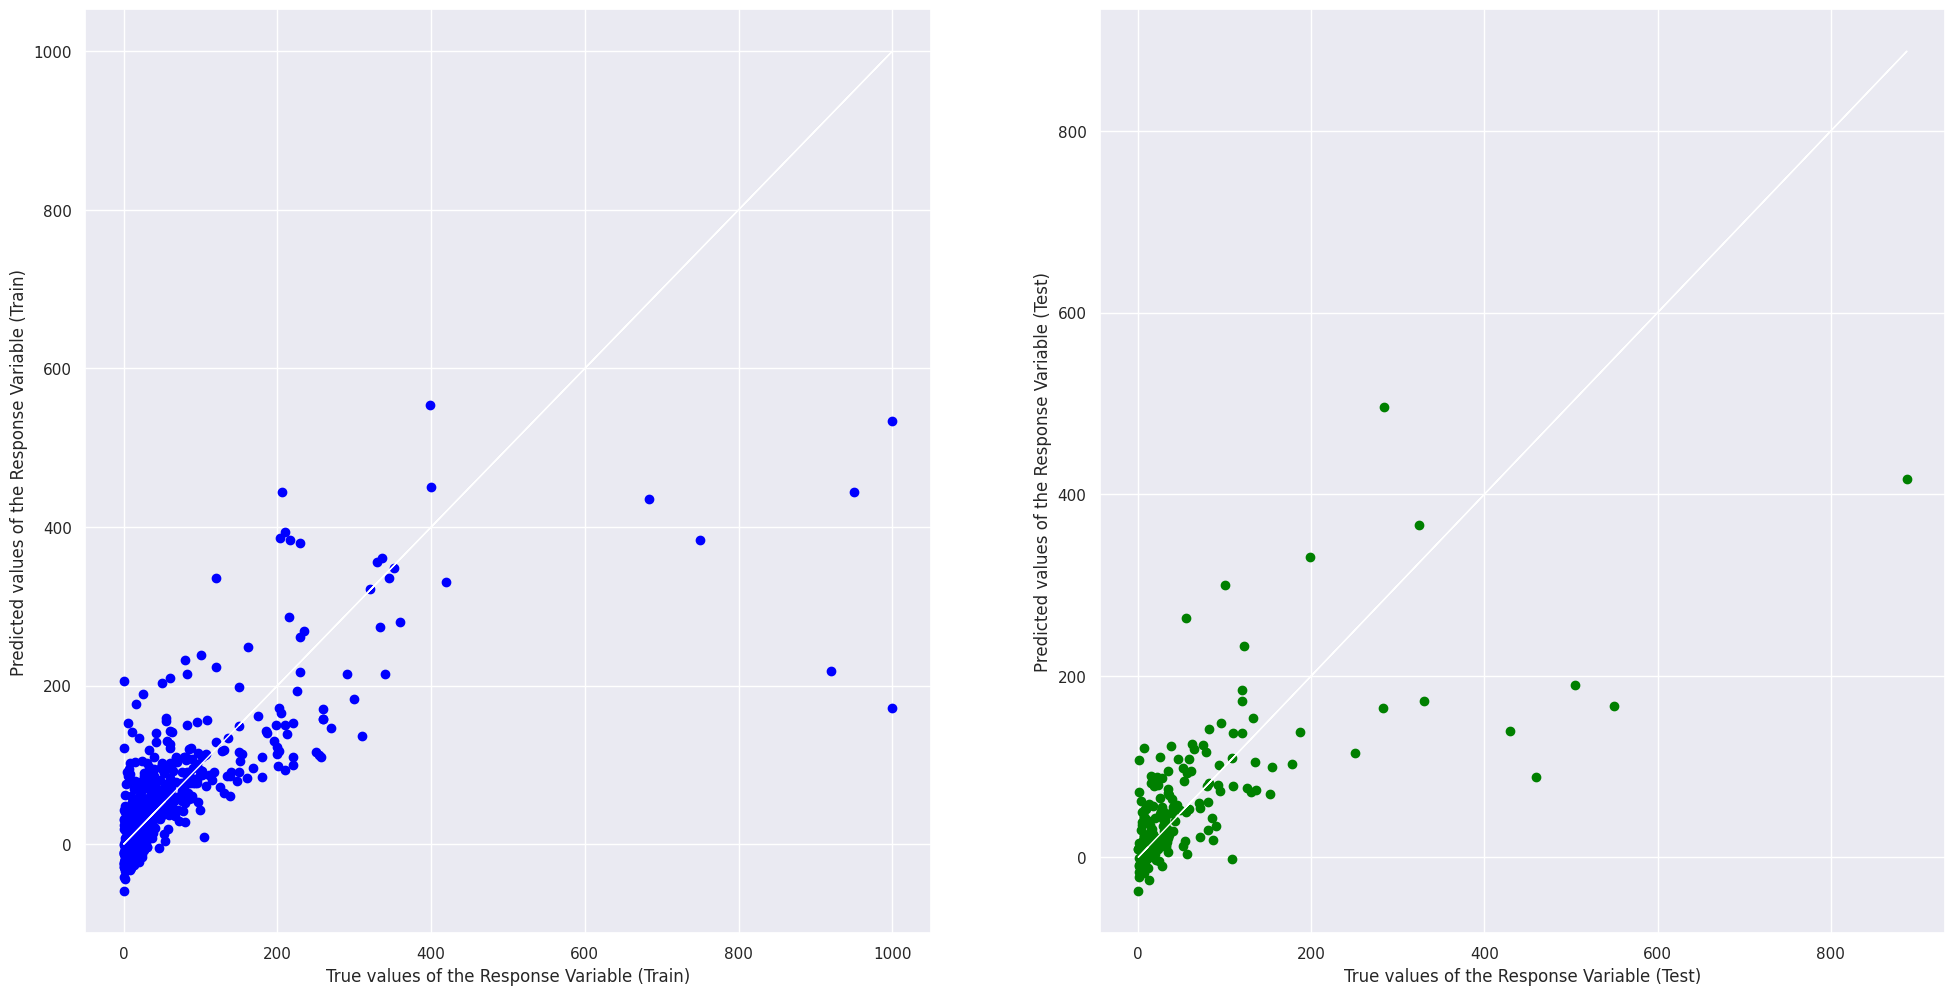

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5615058072504296
Mean Squared Error (MSE) 	: 5416.192155963633

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4622195582307185
Mean Squared Error (MSE) 	: 5787.9710405341375



In [66]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(pokedata_ohe["weight_kg"])
X = pd.DataFrame(pokedata_ohe.drop('weight_kg', axis = 1))
#X = pokedata.loc[:,~pokedata.columns.isin(['base_egg_steps','base_happiness','base_total','experience_growth','name','type1','type2','weight_kg','is_legendary'])]
#X = X.loc[:,~(X.columns.str.endswith('0') and not X.columns.str.startswith('egg')]
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# **Linear Regression Model without Outliers (new dataframe with outliers dropped)**

In [48]:
Q3 = np.quantile(pokedata_ohe['weight_kg'], 0.75)
Q1 = np.quantile(pokedata_ohe['weight_kg'], 0.25)
IQR = Q3 - Q1
pokedata_ohe_drop = pokedata_ohe.drop(pokedata_ohe[(pokedata_ohe['weight_kg'] < Q1 - 1.5 * IQR) | (pokedata_ohe['weight_kg'] > Q3 + 1.5 * IQR)].index)
pokedata_ohe_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 800
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attack                    700 non-null    int64  
 1   capture_rate              700 non-null    int64  
 2   defense                   700 non-null    int64  
 3   height_m                  700 non-null    float64
 4   hp                        700 non-null    int64  
 5   sp_defense                700 non-null    int64  
 6   against_dragon_cat_1      700 non-null    float64
 7   against_electric_cat_0.0  700 non-null    float64
 8   against_electric_cat_1    700 non-null    float64
 9   against_electric_cat_4.0  700 non-null    float64
 10  against_fairy_cat_0       700 non-null    float64
 11  against_fairy_cat_0.25    700 non-null    float64
 12  against_fairy_cat_2.0     700 non-null    float64
 13  against_fairy_cat_4.0     700 non-null    float64
 14  against_fi

Intercept of Regression 	: b =  [-9.46016251]
Coefficients of Regression 	: a =  [[ 8.24779520e-02  1.90462647e-02  2.11612659e-01  3.11397902e+01
   1.86079436e-01  1.79597983e-02  5.89416420e+00  8.24585978e-01
   1.99789962e+00 -2.82248559e+00  7.18531650e+00 -1.32251880e+01
   4.98389202e+00  1.05597945e+00 -8.29899009e+00  3.82426562e+00
   6.67936627e-01  2.71517807e+00  1.06818937e+01 -9.59028389e+00
  -4.96399638e+00 -9.90128617e-01  4.71841410e+00 -1.69811996e+00
  -3.09511123e+00  6.02894209e+00 -1.37569857e+01  2.16238083e+01
  -7.86682266e+00 -8.46200737e+00  1.97040628e+01 -1.12420554e+01
   8.09755037e+00  6.68381231e+00 -1.05293867e+00  1.30381987e+00
  -6.49947738e+00 -8.53276651e+00  2.35908802e+01 -2.73354160e+00
   2.66453526e-15  2.73354160e+00 -3.04409060e+01 -8.62395719e+00
  -1.43080247e+00 -1.06794765e+00  1.11227073e+01  3.09304337e+00
  -1.32043722e+00 -1.77260615e+00 -1.89511204e+00 -1.46401222e+01
   1.32166301e+00  1.88163579e+00  8.78919409e+00 -5.98866256

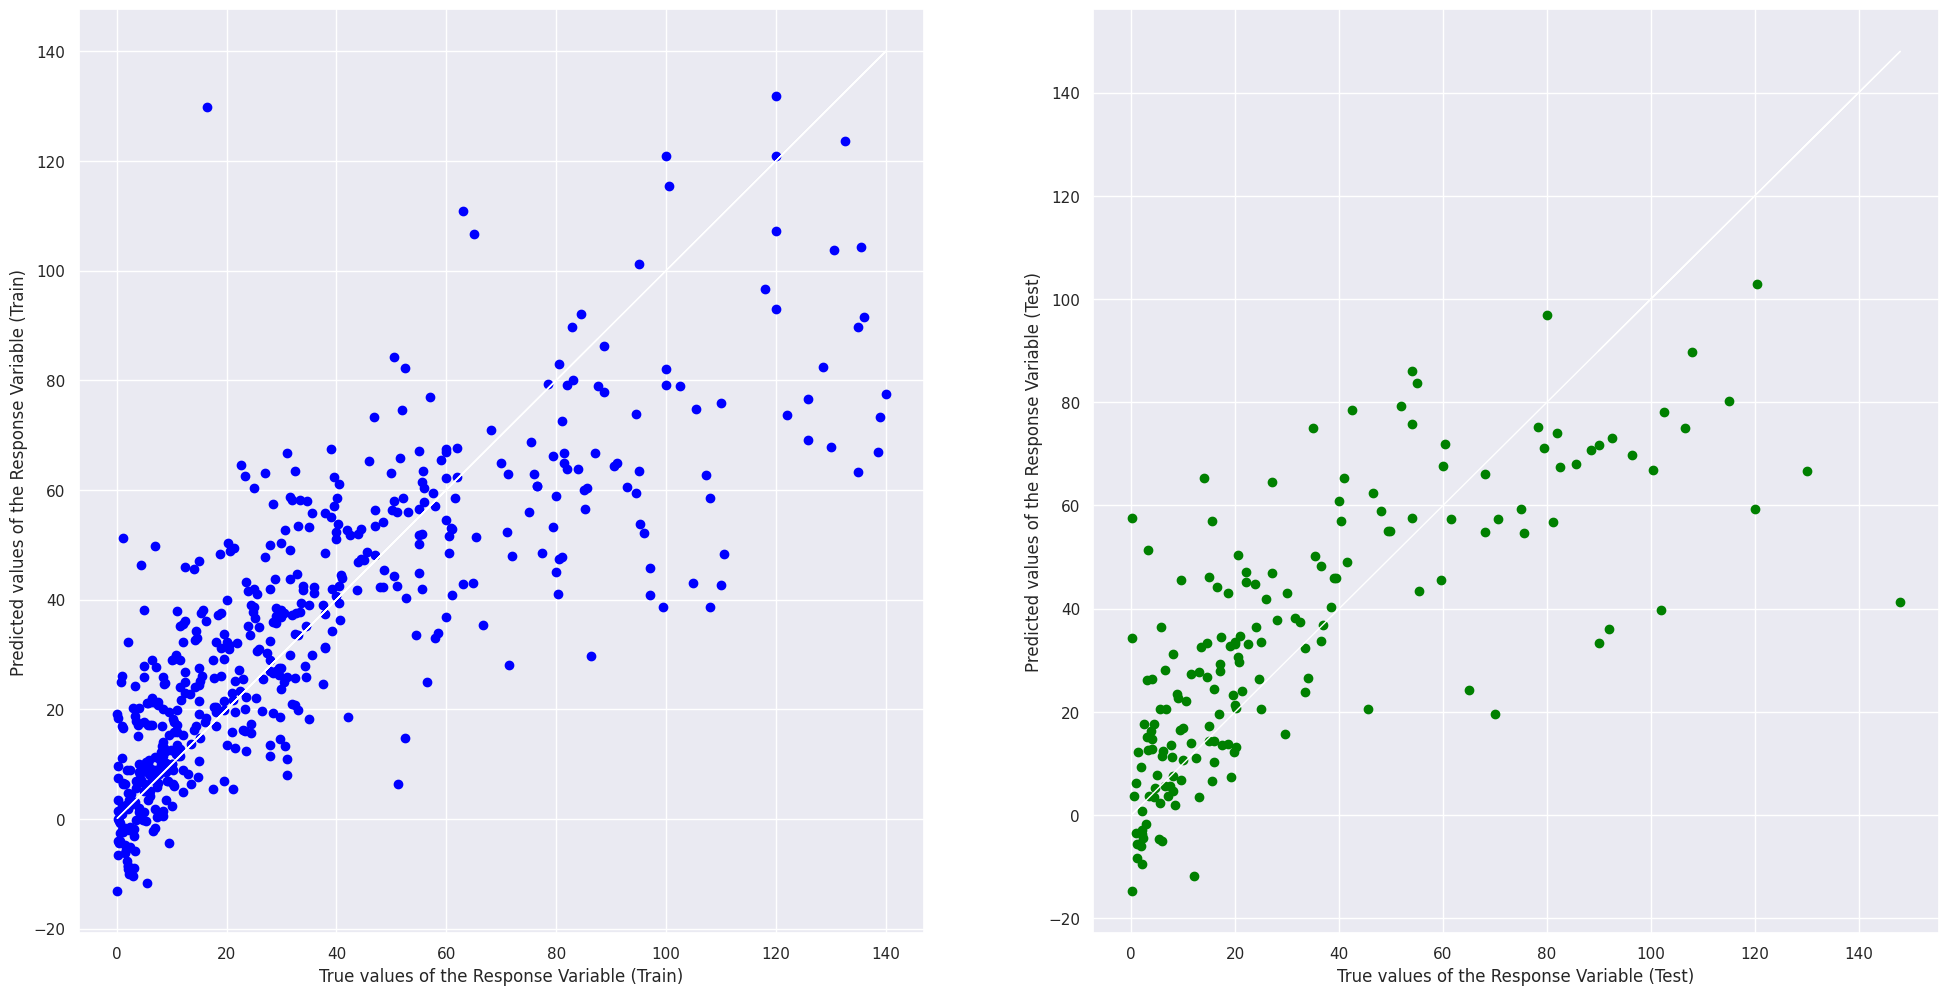

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6472635925472621
Mean Squared Error (MSE) 	: 382.7064253583969

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5459793826533093
Mean Squared Error (MSE) 	: 471.8389327413745



In [49]:
# Extract Response and Predictors
y = pd.DataFrame(pokedata_ohe_drop["weight_kg"])
X = pd.DataFrame(pokedata_ohe_drop.drop('weight_kg', axis = 1))
#X = pokedata.loc[:,~pokedata.columns.isin(['base_egg_steps','base_happiness','base_total','experience_growth','name','type1','type2','weight_kg','is_legendary'])]
#X = X.loc[:,~(X.columns.str.endswith('0') and not X.columns.str.startswith('egg')]
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

<Axes: xlabel='weight_kg', ylabel='is_legendary_1'>

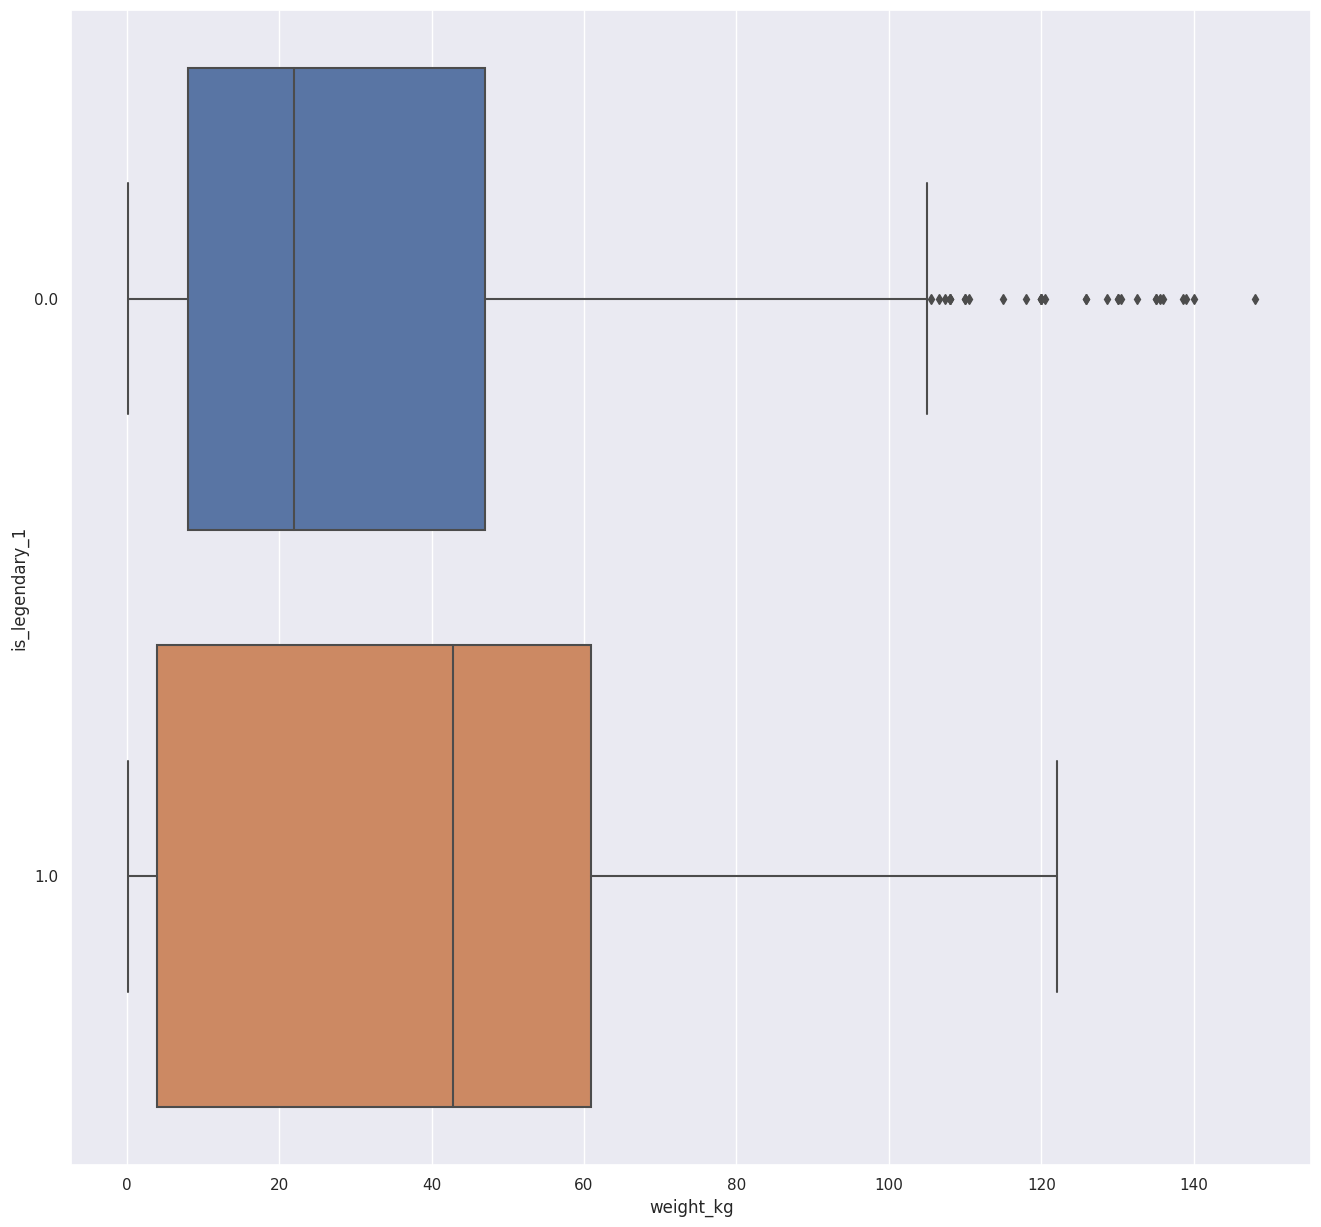

In [52]:
f = plt.figure(figsize=(16,15))
sb.boxplot(data=pokedata_ohe_drop, x='weight_kg', y='is_legendary_1', orient="h")

# **Random Forest Regression (first line of code can be interchanged with dataframe without outliers)**

In [59]:
# Extract Response and Predictors
y = pokedata_ohe['weight_kg'] #can switch interchangeably with pokedata_ohe_drop (Dataframe without outliers)
X = pokedata_ohe.drop('weight_kg', axis = 1)
feature_list = list(X.columns)
X = np.array(X)
y = np.array(y)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, max_depth = 10)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)

from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error
# Use the forest's predict method on the train data
train_predictions = regressor.predict(X_train)
# Use the forest's predict method on the test data
test_predictions = regressor.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, train_predictions))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, train_predictions))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, test_predictions))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, test_predictions))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9301498879003774
Mean Squared Error (MSE) 	: 858.2464582690731

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3918932590328532
Mean Squared Error (MSE) 	: 6662.331594001999



In [60]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: height_m             Importance: 0.53
Variable: base_happiness_cat_0 Importance: 0.08
Variable: hp                   Importance: 0.06
Variable: capture_rate         Importance: 0.05
Variable: attack               Importance: 0.04
Variable: defense              Importance: 0.04
Variable: sp_defense           Importance: 0.03
Variable: against_poison_0.0   Importance: 0.02
Variable: against_fairy_cat_0.25 Importance: 0.01
Variable: against_fairy_cat_4.0 Importance: 0.01
Variable: against_normal_cat_0 Importance: 0.01
Variable: against_poison_0.5   Importance: 0.01
Variable: against_poison_1.0   Importance: 0.01
Variable: against_rock_cat_0.5 Importance: 0.01
Variable: base_happiness_cat_1 Importance: 0.01
Variable: is_legendary_1       Importance: 0.01
Variable: experience_growth_cat_1 Importance: 0.01
Variable: type1_cat_1          Importance: 0.01
Variable: type2_cat_1          Importance: 0.01
Variable: against_dragon_cat_1 Importance: 0.0
Variable: against_electric_cat_0.0 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

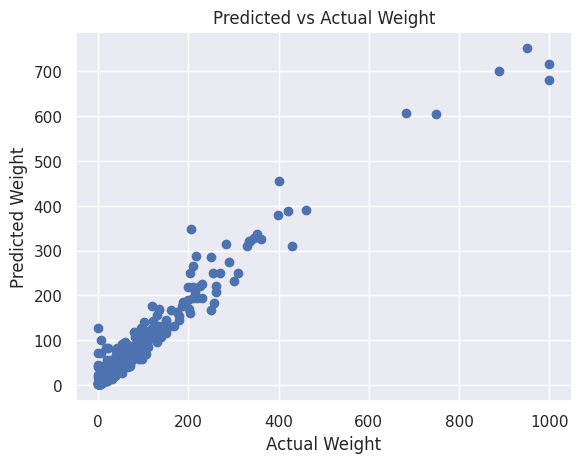

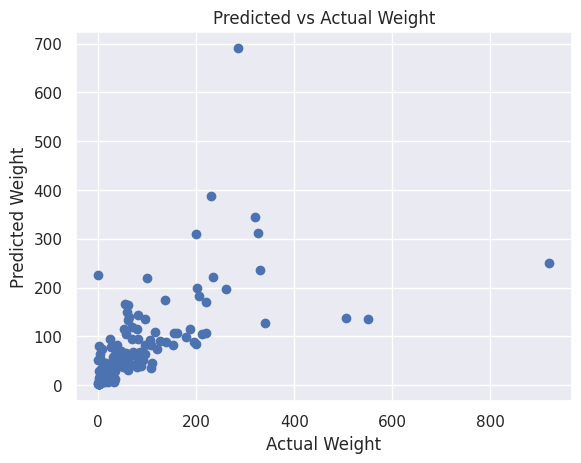

In [61]:
plt.scatter(y_train, train_predictions)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Predicted vs Actual Weight')
plt.show()


# create scatter plot of predicted vs actual values
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Predicted vs Actual Weight')
plt.show()

# **Random Forest Regression with GridSearchCV**

In [62]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': np.arange(100,501,100),   # number of trees 100, 200, ..., 1000
    'max_depth': np.arange(5, 21)
}

# Creating a grid search object
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

# Printing the best parameters and score
print("Best parameters: ", grid_search.best_params_)

# Use the forest's predict method on the train data
train_predictions = grid_search.predict(X_train)
# Use the forest's predict method on the test data
test_predictions = grid_search.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, train_predictions))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, train_predictions))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, test_predictions))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, test_predictions))
print()


Best parameters:  {'max_depth': 7, 'n_estimators': 100}
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9094472836059909
Mean Squared Error (MSE) 	: 1112.6188032591874

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.36983655968934925
Mean Squared Error (MSE) 	: 6903.981677771699



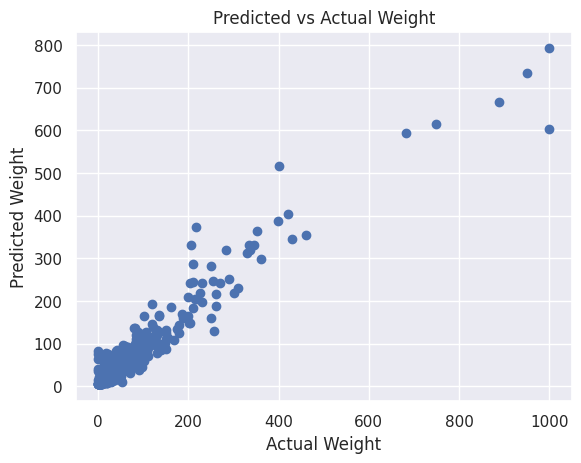

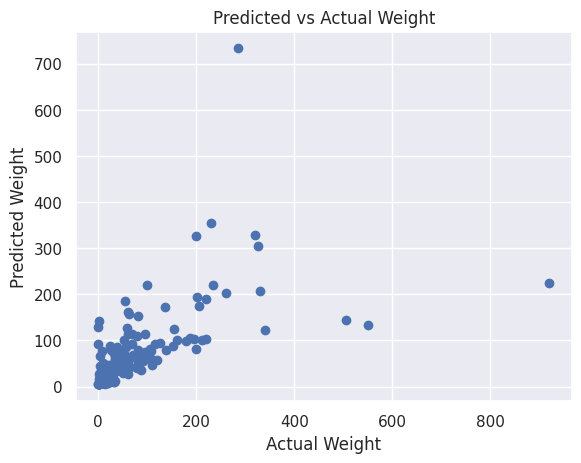

In [63]:
plt.scatter(y_train, train_predictions)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Predicted vs Actual Weight')
plt.show()


# create scatter plot of predicted vs actual values
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Predicted vs Actual Weight')
plt.show()